In [2]:
%load_ext autoreload

import os, sys
import networkx as nx

sys.path.insert(0, "../")
sys.path.insert(0, "/home/j/joppich/.local/lib/python3.11/site-packages/")
#otherwise leidenalg is used in an outdated version ...

import leidenalg as la
print("la", la.version)

%autoreload 2
from PICASO.kgraph import *
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

import pickle

la 0.10.2


In [3]:
kg = KGraph()
kg.load_kgraph("../data/initial_base_graph.out")

In [23]:
kg

KGraph KGraph with 111032 nodes and 1617389 edges

In [3]:
exprKGs = None
exprKGs = pickle.load(open("myocardial_exprkgs.pickle", "rb"))

In [4]:
tissue2zone2kg = defaultdict(lambda : dict())
for x in exprKGs:
    tissue, zone = x.split("_")
    
    tissue2zone2kg[tissue]["{}_{}".format(tissue, zone)] = exprKGs[x]

In [5]:
for x in tissue2zone2kg:
    print(x, len(tissue2zone2kg[x]), [x for x in tissue2zone2kg[x]])

Adipocyte 5 ['Adipocyte_BZ', 'Adipocyte_CTRL', 'Adipocyte_FZ', 'Adipocyte_IZ', 'Adipocyte_RZ']
Cardiomyocyte 5 ['Cardiomyocyte_BZ', 'Cardiomyocyte_CTRL', 'Cardiomyocyte_FZ', 'Cardiomyocyte_IZ', 'Cardiomyocyte_RZ']
Cycling cells 5 ['Cycling cells_BZ', 'Cycling cells_CTRL', 'Cycling cells_FZ', 'Cycling cells_IZ', 'Cycling cells_RZ']
Endothelial 5 ['Endothelial_BZ', 'Endothelial_CTRL', 'Endothelial_FZ', 'Endothelial_IZ', 'Endothelial_RZ']
Fibroblast 5 ['Fibroblast_BZ', 'Fibroblast_CTRL', 'Fibroblast_FZ', 'Fibroblast_IZ', 'Fibroblast_RZ']
Lymphoid 5 ['Lymphoid_BZ', 'Lymphoid_CTRL', 'Lymphoid_FZ', 'Lymphoid_IZ', 'Lymphoid_RZ']
Mast 5 ['Mast_BZ', 'Mast_CTRL', 'Mast_FZ', 'Mast_IZ', 'Mast_RZ']
Myeloid 5 ['Myeloid_BZ', 'Myeloid_CTRL', 'Myeloid_FZ', 'Myeloid_IZ', 'Myeloid_RZ']
Neuronal 5 ['Neuronal_BZ', 'Neuronal_CTRL', 'Neuronal_FZ', 'Neuronal_IZ', 'Neuronal_RZ']
Pericyte 5 ['Pericyte_BZ', 'Pericyte_CTRL', 'Pericyte_FZ', 'Pericyte_IZ', 'Pericyte_RZ']
vSMCs 5 ['vSMCs_BZ', 'vSMCs_CTRL', 'vSMCs_FZ

In [3]:
zoneSort = {
        "CTRL": 0,
        "RZ": 1,
        "BZ": 2,
        "IZ": 3,
        "FZ": 4
    }

In [7]:
tlda = TwoLevelDifferentialAnalysis(tissue2zone2kg, [x for x in zoneSort], output_folder_formatter="diff_{}/", fullKG=kg)

In [8]:
[(x, type(tlda.__dict__[x])) for x in tlda.__dict__]

[('tldict', dict),
 ('sorted_zones', list),
 ('name_sep', str),
 ('cellgroupdata', mikg.kgraph.DefaultDict),
 ('fullKG', mikg.kgraph.KGraph),
 ('output_folder_formatter', str),
 ('recalc_warning', bool)]

In [9]:
#%%capture captured_plot_module_calc
tlda.calculate_modules(relevant_cellgroups=None, reference_formatter="{}_CTRL")

Adipocyte


/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/scipy/stats/_stats_py.py:6556: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1113: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/si

{'Adipocyte_RZ': KGraph KGraph_vs_KGraph with 111032 nodes and 1617389 edges, 'Adipocyte_BZ': KGraph KGraph_vs_KGraph with 111032 nodes and 1617389 edges, 'Adipocyte_IZ': KGraph KGraph_vs_KGraph with 111032 nodes and 1617389 edges, 'Adipocyte_FZ': KGraph KGraph_vs_KGraph with 111032 nodes and 1617389 edges}
Analysing Adipocyte_RZ
Identified communities
Number of communities: 279
Average community size 41.053763440860216
Median community size 32.0
Quantile (0,0.25,0.5,0.75,1) community size [  2.   20.   32.   53.5 317. ]
Significant communities
Number of communities: 4
Average community size 23.0
Median community size 23.0
Quantile (0,0.25,0.5,0.75,1) community size [14.  15.5 23.  30.5 32. ]
Adipocyte_RZ_mod_254 16
Adipocyte_RZ_mod_252 32
Adipocyte_RZ_mod_218 14
Adipocyte_RZ_mod_37 30
Number of saved communities: 0
Analysing Adipocyte_BZ
Identified communities
Number of communities: 270
Average community size 33.662962962962965
Median community size 27.0
Quantile (0,0.25,0.5,0.75,1) c

/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:2203: RuntimeWarning: divide by zero encountered in scalar divide
  return (u1 - u2) / s


Significant communities
Number of communities: 8
Average community size 19.875
Median community size 17.5
Quantile (0,0.25,0.5,0.75,1) community size [11.  14.5 17.5 21.  39. ]
Neuronal_RZ_mod_116 11
Neuronal_RZ_mod_90 19
Neuronal_RZ_mod_105 39
Neuronal_RZ_mod_68 13
Neuronal_RZ_mod_58 17
Neuronal_RZ_mod_143 15
Neuronal_RZ_mod_80 18
Neuronal_RZ_mod_76 27
Number of saved communities: 0
Analysing Neuronal_BZ
Identified communities
Number of communities: 269
Average community size 14.364312267657992
Median community size 12.0
Quantile (0,0.25,0.5,0.75,1) community size [  2.   3.  12.  19. 107.]
Significant communities
Number of communities: 16
Average community size 26.5
Median community size 18.5
Quantile (0,0.25,0.5,0.75,1) community size [10.   15.75 18.5  34.75 83.  ]
Neuronal_BZ_mod_216 18
Neuronal_BZ_mod_117 34
Neuronal_BZ_mod_199 17
Neuronal_BZ_mod_237 11
Neuronal_BZ_mod_66 37
Neuronal_BZ_mod_8 83
Neuronal_BZ_mod_65 12
Neuronal_BZ_mod_118 31
Neuronal_BZ_mod_63 41
Neuronal_BZ_mod_18

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


{'vSMCs_RZ': KGraph KGraph_vs_KGraph with 111032 nodes and 1617389 edges, 'vSMCs_BZ': KGraph KGraph_vs_KGraph with 111032 nodes and 1617389 edges, 'vSMCs_IZ': KGraph KGraph_vs_KGraph with 111032 nodes and 1617389 edges, 'vSMCs_FZ': KGraph KGraph_vs_KGraph with 111032 nodes and 1617389 edges}
Analysing vSMCs_RZ
Identified communities
Number of communities: 265
Average community size 17.184905660377357
Median community size 15.0
Quantile (0,0.25,0.5,0.75,1) community size [  2.   3.  15.  23. 143.]
Significant communities
Number of communities: 7
Average community size 43.714285714285715
Median community size 27.0
Quantile (0,0.25,0.5,0.75,1) community size [ 15.   19.5  27.   41.  143. ]
vSMCs_RZ_mod_65 33
vSMCs_RZ_mod_234 23
vSMCs_RZ_mod_132 49
vSMCs_RZ_mod_79 27
vSMCs_RZ_mod_142 16
vSMCs_RZ_mod_166 15
vSMCs_RZ_mod_2 143
Number of saved communities: 0
Analysing vSMCs_BZ
Identified communities
Number of communities: 264
Average community size 17.113636363636363
Median community size 15.

In [10]:
#captured_plot_module_calc()

In [11]:
[(x, type(tlda.__dict__[x])) for x in tlda.__dict__]

[('tldict', dict),
 ('sorted_zones', list),
 ('name_sep', str),
 ('cellgroupdata', mikg.kgraph.DefaultDict),
 ('fullKG', mikg.kgraph.KGraph),
 ('output_folder_formatter', str),
 ('recalc_warning', bool)]

In [12]:
with open("cardiomyocyte_tlda.pickle", 'wb') as f:    
    pickle.dump(tlda, f)

In [4]:
#import pickle
#with open("cardiomyocyte_tlda.pickle", 'rb') as f:    
#    tlda = pickle.load(f)

In [ ]:
%%capture captured_plot_module_comparisons
tlda.plot_module_comparisons(plot_communities=True)

In [172]:
tlda.plot_module_comparisons(plot_communities=False)

Output directory diff_Adipocyte/
diff_Adipocyte//all_module_heatmap.png
diff_Adipocyte//all_module_compare.png
diff_Adipocyte//score_distribution.png
Output directory diff_Cardiomyocyte/
diff_Cardiomyocyte//all_module_heatmap.png
diff_Cardiomyocyte//all_module_compare.png
diff_Cardiomyocyte//score_distribution.png
Output directory diff_Cycling cells/
diff_Cycling cells//all_module_heatmap.png
diff_Cycling cells//all_module_compare.png
diff_Cycling cells//score_distribution.png
Output directory diff_Endothelial/
diff_Endothelial//all_module_heatmap.png
diff_Endothelial//all_module_compare.png
diff_Endothelial//score_distribution.png
Output directory diff_Fibroblast/
diff_Fibroblast//all_module_heatmap.png
diff_Fibroblast//all_module_compare.png
diff_Fibroblast//score_distribution.png
Output directory diff_Lymphoid/
diff_Lymphoid//all_module_heatmap.png
diff_Lymphoid//all_module_compare.png
diff_Lymphoid//score_distribution.png
Output directory diff_Mast/
diff_Mast//all_module_heatmap.pn

In [ ]:
1+1

In [15]:
#captured_plot_module_comparisons()

In [16]:
ct=CommunityTool()
ct.compare_modules(tlda.communities, figsize=(75,75))

In [17]:
descrDF = tlda.describe_modules()
descrDF.to_csv("diff_modules_description.tsv", sep="\t")
descrDF

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


name                                         gene_nodes  \
0    Adipocyte_BZ_mod_156  [LGALS12, LGALS9, PDZK1, SLC15A2, SLC15A4, SLC...   
1    Adipocyte_BZ_mod_242  [MIEN1, MOSPD2, PCTP, PGAP3, PRDX1, STARD3, ST...   
2    Adipocyte_BZ_mod_194  [ARSD, CHD2, GSDMA, HPN, LBX2, NAPSA, NPIPA1, ...   
3    Adipocyte_IZ_mod_151  [ADGRE5, FUS, IGF2, IGF2BP3, IRF8, MYCN, NR5A1...   
4    Adipocyte_IZ_mod_131  [ADA, CASP8, CNTNAP2, DNPEP, DPP10, DPP4, DPP6...   
..                    ...                                                ...   
261      vSMCs_FZ_mod_157  [APBA1, APBA2, APBB2, BET1, BET1L, CACNA1B, CA...   
262        vSMCs_FZ_mod_1  [ADH1B, ADI1, ALDH2, ALDH3A2, AMD1, ANK3, ANKZ...   
263       vSMCs_FZ_mod_97  [ADIPOQ, ADIPOR2, ANGPTL4, CCNC, CDH13, CDK19,...   
264      vSMCs_FZ_mod_273  [ANAPC1, ANAPC11, ARMC10, BCL3, BUB3, CD24, CD...   
265      vSMCs_FZ_mod_220  [AADAT, DHTKD1, DLAT, DLD, DLST, ELOVL7, GCDH,...   

                                         geneset_nodes  \
0    [(GO:0015655, alanine:sodium symporter activit...   
1    [(GO:0140284, endoplasmic reticulum-endosome m...   
2    [(GO:0005353, fructose transmembrane transport...   
3    [(GO:2000195, negative regulation of female go...   
4    [(GO:0033632, regulation of cell-cell adhesion...   
..                                                 ...   
261                                                 []   
262  [(GO:0004145, diamine N-acetyltransferase acti...   
263  [(GO:0042809, nuclear vitamin D receptor bindi...   
264  [(GO:0042723, thiamine-containing compound met...   
265  [(GO:0010510, regulation of acetyl-CoA biosynt...   

                   disease_nodes                                drug_nodes  \
0                             []                                        []   
1                             []                                        []   
2                             []                                        []   
3                             []                                        []   
4                             []                                        []   
..                           ...                                       ...   
261  [(HP:0000473, Torticollis)]                                        []   
262                           []                 [(CHEMBL964, DISULFIRAM)]   
263                           []                                        []   
264                           []            [(CHEMBL2109355, DUSIGITUMAB)]   
265                           []  [(CHEMBL306823, SODIUM DICHLOROACETATE)]   

                                           ncRNA_nodes  \
0                                                   []   
1                                                   []   
2                                                   []   
3                                    [mir-615, mir-96]   
4                                            [mir-153]   
..                                                 ...   
261                                           [mir-31]   
262  [mir-124, mir-141, mir-200a, mir-200b, mir-200...   
263                                           [let-7c]   
264  [let-7a, let-7b, mir-34a, mir-373, mir-378a, m...   
265                                                 []   

                                          TF_nodes other_nodes  \
0                                               []          {}   
1                                               []          {}   
2                                     [LBX2, RXRA]          {}   
3    [IRF8, MYCN, NR5A1, PAX2, SNAI2, WT1, ZNF224]          {}   
4                                           [ETV6]          {}   
..                                             ...         ...   
261                                             []          {}   
262                                [ANKZF1, KLF11]          {}   
263                                        [ZFHX3]          {}   
264                        [HES6, KLF4, MSC, TP53]          {}   
265

In [18]:
geneset_overlapDF = tlda.create_overlap_df("geneset")
geneset_overlapDF.head()

27643


celltype                module     geneset  geneset_size  \
0  Adipocyte  Adipocyte_BZ_mod_156  GO:0001504             8   
1  Adipocyte  Adipocyte_BZ_mod_156  GO:0001618            79   
2  Adipocyte  Adipocyte_BZ_mod_156  GO:0002519             3   
3  Adipocyte  Adipocyte_BZ_mod_156  GO:0003333            27   
4  Adipocyte  Adipocyte_BZ_mod_156  GO:0003723          1395   

                              geneset_name   overlap   jaccard  
0                  neurotransmitter uptake  0.250000  0.100000  
1                  virus receptor activity  0.012658  0.010870  
2  natural killer cell tolerance induction  0.333333  0.062500  
3       amino acid transmembrane transport  0.222222  0.171429  
4                              RNA binding  0.000717  0.000710

In [19]:
disease_overlapDF = tlda.create_overlap_df("disease")
disease_overlapDF.head()

7184


celltype                module      disease  disease_size  \
0  Adipocyte  Adipocyte_BZ_mod_156   GO:0006954           395   
1  Adipocyte  Adipocyte_BZ_mod_156   GO:0070527            46   
2  Adipocyte  Adipocyte_BZ_mod_156  EFO:0005409           105   
3  Adipocyte  Adipocyte_BZ_mod_156  EFO:0004995           141   
4  Adipocyte  Adipocyte_BZ_mod_156  EFO:0004842            73   

            disease_name   overlap   jaccard  
0  inflammatory response  0.002532  0.002451  
1   platelet aggregation  0.021739  0.016949  
2          fat body mass  0.009524  0.008475  
3         lean body mass  0.007092  0.006494  
4       eosinophil count  0.013699  0.011628

In [20]:
drug_overlapDF = tlda.create_overlap_df("drug")
drug_overlapDF.head()

3195


celltype                module         drug  drug_size     drug_name  \
0  Adipocyte  Adipocyte_BZ_mod_194   CHEMBL1023          3    BEXAROTENE   
1  Adipocyte  Adipocyte_BZ_mod_194    CHEMBL705          6  ALITRETINOIN   
2  Adipocyte  Adipocyte_BZ_mod_194   CHEMBL1131          6     ACITRETIN   
3  Adipocyte  Adipocyte_BZ_mod_194  CHEMBL75133          3      IRX-4204   
4  Adipocyte  Adipocyte_BZ_mod_194  CHEMBL53418          1      DANTHRON   

    overlap   jaccard  
0  0.333333  0.050000  
1  0.166667  0.043478  
2  0.166667  0.043478  
3  0.333333  0.050000  
4  1.000000  0.055556

In [21]:
geneset_overlapDF.to_csv("diff_modules_description_overlap_geneset.tsv", sep="\t")
disease_overlapDF.to_csv("diff_modules_description_overlap_disease.tsv", sep="\t")
drug_overlapDF.to_csv("diff_modules_description_overlap_drug.tsv", sep="\t")


In [9]:
import scanpy as sc

adata = sc.read_h5ad("snRNA-seq-submission.h5ad")
celltype_col="cell_type_original"
condition_col = "major_labl"

adata.obs[condition_col] = pd.Categorical(adata.obs[condition_col], ordered=True, categories=[x for x in zoneSort])

adata.obs["ct_region"] = adata.obs["cell_type_original"].astype(str) + "_" + adata.obs["major_labl"].astype(str)
adata.obs["ct_region"] = pd.Categorical(adata.obs["ct_region"])

In [23]:
rel_modules = descrDF[descrDF.drug_nodes.apply(len) != 0].sort_values(["base_condition", "base_condition_score_mean"], ascending=[True, False]).groupby(['base_condition']).head(3)
rel_modules

name  \
44   Cardiomyocyte_FZ_mod_220   
32     Cardiomyocyte_FZ_mod_6   
18   Cardiomyocyte_IZ_mod_128   
12    Cardiomyocyte_IZ_mod_54   
23    Cardiomyocyte_IZ_mod_42   
52    Cycling cells_IZ_mod_41   
62     Endothelial_IZ_mod_206   
67     Endothelial_IZ_mod_170   
69     Endothelial_IZ_mod_182   
100      Fibroblast_FZ_mod_47   
105      Fibroblast_FZ_mod_48   
89      Fibroblast_IZ_mod_217   
84      Fibroblast_IZ_mod_127   
96      Fibroblast_IZ_mod_190   
122       Lymphoid_FZ_mod_153   
124         Lymphoid_FZ_mod_4   
107        Lymphoid_IZ_mod_58   
111       Lymphoid_IZ_mod_232   
116       Lymphoid_IZ_mod_181   
127            Mast_BZ_mod_52   
138            Mast_FZ_mod_22   
161            Mast_FZ_mod_60   
158           Mast_FZ_mod_113   
125           Mast_RZ_mod_159   
173        Myeloid_FZ_mod_171   
179         Myeloid_FZ_mod_53   
178        Myeloid_FZ_mod_154   
163         Myeloid_IZ_mod_96   
162         Myeloid_IZ_mod_33   
207        Neuronal_FZ_mod_77   
183       Neuronal_IZ_mod_202   
189        Neuronal_IZ_mod_85   
200        Neuronal_IZ_mod_57   
225        Pericyte_IZ_mod_50   
222        Pericyte_IZ_mod_62   
219       Pericyte_IZ_mod_228   
265          vSMCs_FZ_mod_220   
264          vSMCs_FZ_mod_273   
262            vSMCs_FZ_mod_1   
240          vSMCs_IZ_mod_251   

                                            gene_nodes  \
44   [ADH1B, ALDH3A2, AMD1, CDCA7L, COMT, GLO1, GRH...   
32   [AASS, ABAT, ABL2, ACAA1, ACAA2, ACAD10, ACAD8...   
18   [ADAMTS3, ASPN, COL11A1, COL23A1, COL25A1, COL...   
12   [BMP1, C1R, C1S, COL12A1, COL14A1, COL16A1, CO...   
23   [ADCY8, ADM, ATXN10, ATXN2, CACNA1A, CACNA1B, ...   
52   [BMP5, EFEMP2, ELN, FBLN1, FBLN5, FBLN7, FBN1,...   
62   [ACAN, C5AR1, C5AR2, COL13A1, EDA, FBN1, FN1, ...   
67   [BAD, BAK1, BAX, BCL2L11, BCL2L2, BCL2L2-PABPN...   
69   [AOC3, CALD1, EPHB6, LMOD1, MAFG, MAOA, MIS12,...   
100  [AASS, ABAT, ACACB, ACADS, ACAT1, ACOX1, ACOX3...   
105  [CNTFR, CRLF1, CSF3R, CYP46A1, ELP2, EPOR, GHR...   
89   [EPRS, ERO1A, F3, F8, FAM20A, FAM20C, FGF23, G...   
84   [ARSA, CCDC180, CDK10, CDK12, CDK13, CDK16, CD...   
96   [BGLAP, CD74, COL18A1, CSTB, CTSB, CTSC, CTSD,...   
122  [ANXA5, BIRC3, BRAP, CAPZB, CASP10, CASP8, CAS...   
124  [ABAT, ACACB, ACLY, ACOX3, ACSF3, ACSS1, ACSS2...   
107  [ARAF, C2, CFH, COL8A1, EFEMP1, ERO1A, FAM20A,...   
111  [CCDC88C, FGF7, FIP1L1, GLMN, IDH1, MBTPS1, NF...   
116  [BGLAP, BID, COL15A1, COL18A1, CSTA, CTSB, CTS...   
127  [CD180, CDC42SE2, CFAP46, CPQ, CYP1B1, DTX3L, ...   
138  [AMMECR1, APOD, ARRDC5, ATXN7L1, CDHR3, CRISPL...   
161  [ACBD3, ANKAR, ARFRP1, ARL1, CADPS2, CNIH2, CO...   
158  [A4GALT, AKR1B1, AKR1C3, AMDHD2, B3GALT4, BCAT...   
125  [CD63, DPYSL2, DYRK2, ERAP2, FAM3C, GLG1, GPSM...   
173  [ELN, FBLN5, FBN1, KHDRBS3, LGALS3, LOXL3, MFG...   
179  [CYP27A1, CYP2R1, ETS2, FDX1, HSCB, HSPA4, HSP...   
178  [ANKRD6, AXIN1, AXIN2, BACE1, BLZF1, CHKA, CHK...   
163  [ADGRG1, ASPN, BMP1, CD93, COL11A1, COL24A1, C...   
162  [BMP5, EFEMP2, ELN, FBLN5, FBN1, HSPA5, LOX, L...   
207  [KCNMA1, KCNMB3, KCNMB4, MFSD11, NAPEPLD, PGM1...   
183  [ATG5, CALCB, CALCRL, CELSR1, CRCP, DCLK3, GAB...   
189  [BTN3A1, BTN3A2, C5, C5AR1, C5AR2, CANX, CCL22...   
200  [AIFM1, ALDH1L1, BANF1, BCL2L11, BCL2L2, BCL2L...   
225  [AHRR, ARNT, BMP1, ELN, FBLN5, HAND2, HDAC2, K...   
222  [ANTXR2, C2, CD46, CFH, CFI, COL8A1, CRP, EFEM...   
219  [ABCB1, ABCC1, ABCC10, ABCC3, ABCC4, ABCC5, AB...   
265  [AADAT, DHTKD1, DLAT, DLD, DLST, ELOVL7, GCDH,...   
264  [ANAPC1, ANAPC11, ARMC10, BCL3, BUB3, CD24, CD...   
262  [ADH1B, ADI1, ALDH2, ALDH3A2, AMD1, ANK3, ANKZ...   
240  [ABCA1, ABCG1, DTNB, GJC2, GPCPD1, LCAT, LYPLA...   

                                         geneset_nodes  \
44   [(GO:0052596, phenethylamine:oxygen oxidoreduc...   
32   [(GO:0003857, 3-hydroxyacyl-CoA dehydrogenase ...   
18   [(GO:0005588, collagen type V trimer), (GO:003...   
12   [(GO:0004720, protein-lysine 6-oxidase activit...   
23

In [174]:
adata

AnnData object with n_obs × n_vars = 191795 × 29126
    obs: 'sample', 'n_counts', 'n_genes', 'percent_mito', 'doublet_score', 'dissociation_score', 'cell_type_original', 'patient_region_id', 'patient', 'patient_group', 'major_labl', 'final_cluster', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'ct_region'
    var: 'feature_biotype', 'feature_is_filtered'
    uns: 'X_approximate_distribution', 'X_normalization', 'batch_condition', 'cell_type_original_colors', 'default_embedding', 'schema_version', 'title'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

In [173]:
#%%capture captured_describe_module

tlda.describe_module_scrna(adata, celltype_col, condition_col, module_names=list(rel_modules.name), show_plot=False, plot_folder="module_plots")

disease 7184
geneset 27643
drug 3195
['SP1', 'MYCN', 'KLF11', 'ADH1B', 'INMT', 'COMT', 'ALDH3A2', 'IDO1', 'S100A6', 'PLA2G4A', 'GLO1', 'PTTG1', 'LRTOMT', 'MAOA', 'CDCA7L', 'GRHPR', 'SMS', 'HNMT', 'IL12B', 'PNMT', 'TNFSF11', 'SLC18A2', 'SRM', 'SAT2', 'MAOB', 'VAV1', 'HAGH', 'AMD1', 'KLF10', 'SAT1', 'mir-146a', 'mir-655']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Cardiomyocyte_FZ_mod_220 :  module_plots/overview_plot_Cardiomyocyte_FZ_mod_220.png
['MPV17', 'PHYH', 'GNPAT', 'GSTK1', 'HADHA', 'ACLY', 'NUDT19', 'CAT', 'HMGCS1', 'ECHDC1', 'GATM', 'HSD17B4', 'DECR2', 'NUDT7', 'ECI1', 'ADH5', 'MAP4K5', 'SUCLG1', 'ACADS', 'HACL1', 'AOX1', 'ACOX1', 'HIBADH', 'ACAA1', 'MLYCD', 'HSD17B10', 'GCDH', 'DHRS4', 'UCHL3', 'PCCA', 'LONP2', 'HIBCH', 'HADHB', 'MECR', 'ACAA2', 'MCCC2', 'ECHS1', 'RAB11A', 'ACAT2', 'CS', 'EHHADH', 'ALDH9A1', 'ALDH2', 'ALDH7A1', 'ACADVL', 'NSDHL', 'ABAT', 'ACAD8', 'CRAT', 'DHRS11', 'PIPOX', 'ACSF3', 'ACADM', 'ACADSB', 'ALDH6A1', 'DBT', 'SUCLA2', 'PCCB', 'ECI2', 'ACADL', 'SLC25A29', 'ACSS1', 'ABL2', 'BNIP3', 'PEX26', 'OXCT2', 'ACOX2', 'ACOT2', 'DLST', 'RIPK2', 'ACSS3', 'MCCC1', 'ACAD10', 'SCP2', 'ACOX3', 'CPT2', 'AASS', 'MCAT', 'DDO', 'SLC25A20', 'PHYKPL', 'CROT', 'CYBB', 'ECH1', 'HMGCL', 'IVD', 'ACOT8', 'ACAD9', 'BTD', 'EPHX2', 'TYSND1', 'SRA1', 'mir-210']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Cardiomyocyte_FZ_mod_6 :  module_plots/overview_plot_Cardiomyocyte_FZ_mod_6.png
['COL5A3', 'SDC2', 'COL6A1', 'P4HA3', 'ADAMTS3', 'TNR', 'LUM', 'CREBRF', 'ITGA8', 'COL6A2', 'P4HA2', 'COL23A1', 'DDR2', 'COL11A1', 'ITGA7', 'COL5A2', 'P4HA1', 'LAMB4', 'COL4A4', 'GP6', 'ASPN', 'DDR1', 'THBS3', 'ITGA6', 'COL6A3', 'PCOLCE', 'COL3A1', 'COL25A1', 'ITGA9', 'SDC4', 'PCOLCE2', 'ITGB5', 'FRMD5', 'COL5A1', 'ZNF79', 'TLL2', 'ITGA11', 'LAIR1', 'ITGB8', 'SON', 'ITGAV', 'ZNF469', 'ITGA3', 'IGBP1', 'COMP', 'ITGA10', 'DUSP18', 'ITGA2', 'mir-199a']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Cardiomyocyte_IZ_mod_128 :  module_plots/overview_plot_Cardiomyocyte_IZ_mod_128.png
['LOXL1', 'COL24A1', 'LOXL3', 'COL27A1', 'ELN', 'COL14A1', 'MIA3', 'SCFD1', 'C1R', 'MFAP5', 'LOXL2', 'HMBOX1', 'BMP1', 'COL16A1', 'TLL1', 'LOX', 'LOXL4', 'COL7A1', 'C1S', 'PTK7', 'SERPINB1', 'POSTN', 'COL12A1']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Cardiomyocyte_IZ_mod_54 :  module_plots/overview_plot_Cardiomyocyte_IZ_mod_54.png
['CALCRL', 'CFTR', 'VIP', 'TPP1', 'CACNB1', 'SNAP25', 'PTK6', 'RIMS2', 'ADM', 'CACNA2D1', 'GNB2', 'CATSPERD', 'RIMS1', 'SYT1', 'CACNA2D4', 'RGS1', 'GNG2', 'GNG4', 'CD3D', 'RAMP1', 'CACNA1B', 'DNAJC5', 'TRDN', 'ATXN2', 'CACNA1C', 'CACNB3', 'CLN3', 'CACNG3', 'ATXN10', 'ADCY8', 'GIP', 'POLA2', 'GABBR1', 'CACNA1A', 'PPT1', 'CACNB4', 'CRCP', 'CATSPERG', 'CACNG8', 'CD3G', 'CATSPERB', 'CACNB2', 'GNAI2', 'CACNA1H', 'CD4', 'SRMS', 'CLN6', 'HLA-DRB1', 'RAMP3', 'RYR1', 'CD3E', 'mir-641', 'mir-126']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Cardiomyocyte_IZ_mod_42 :  module_plots/overview_plot_Cardiomyocyte_IZ_mod_42.png
['LOXL1', 'HSPA5', 'LOXL3', 'FBLN1', 'MFAP2', 'ELN', 'LTBP3', 'BMP5', 'LTBP2', 'MFAP5', 'LOXL2', 'FBN3', 'EFEMP2', 'MFAP1', 'FBN1', 'LOX', 'LTBP1', 'FBLN7', 'FBLN5']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Cycling cells_IZ_mod_41 :  module_plots/overview_plot_Cycling cells_IZ_mod_41.png
['ITIH4', 'LMX1B', 'MFN2', 'C5AR1', 'GPER1', 'SPG11', 'LGALS8', 'IL18', 'EDA', 'RHOT1', 'FN1', 'LTBP3', 'LTBP2', 'IL17RC', 'LRP4', 'PLXDC1', 'LMLN', 'COL13A1', 'ACAN', 'FBN1', 'LOX', 'TGFBI', 'LRRC4B', 'C5AR2', 'ZIC1', 'NID2', 'LTBP1', 'NID1', 'FSCN1', 'MMP19', 'RPS19', 'PACS2', 'mir-675']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Endothelial_IZ_mod_206 :  module_plots/overview_plot_Endothelial_IZ_mod_206.png
['CTSS', 'BCL2L2-PABPN1', 'CUBN', 'TNFRSF10B', 'COL18A1', 'BCL2L11', 'VDAC2', 'LGMN', 'CTSL', 'CTSC', 'COL15A1', 'BCL2L2', 'BAX', 'SPHK1', 'CTSK', 'CERS6', 'BAK1', 'CTSD', 'CTSZ', 'TXNDC5', 'CTSB', 'BAD', 'NMT1', 'BGLAP', 'TNFRSF25', 'BID', 'mir-3978', 'mir-199a', 'mir-29c', 'mir-659', 'mir-125a']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Endothelial_IZ_mod_170 :  module_plots/overview_plot_Endothelial_IZ_mod_170.png
['TNC', 'AOC3', 'SMOX', 'PMF1', 'SOX4', 'LMOD1', 'PTPRB', 'SMTN', 'MAOA', 'MAFG', 'EPHB6', 'CALD1', 'SMS', 'PRRX1', 'MIS12', 'SRM', 'TCF25', 'SAT2', 'SAT1', 'mir-22']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Endothelial_IZ_mod_182 :  module_plots/overview_plot_Endothelial_IZ_mod_182.png
['AOX1', 'ABAT', 'ACOX1', 'MDH1', 'ADH1B', 'INMT', 'HIBADH', 'ALDH3A2', 'MOCOS', 'SCP2', 'ACOX3', 'ACSF3', 'TECR', 'ALDH6A1', 'MLYCD', 'DBT', 'CD38', 'ZNF236', 'AASS', 'GCDH', 'CAT', 'PC', 'RDH11', 'BST1', 'MAOA', 'PCCB', 'MOCS1', 'RDH5', 'ACSS2', 'HLCS', 'DHRS4', 'NNMT', 'PHYKPL', 'ECHDC1', 'CROT', 'ACSS1', 'PCCA', 'CPT1C', 'ECH1', 'SIRT7', 'CPT1A', 'ACAT1', 'PDXK', 'CPT1B', 'DHRS3', 'HNMT', 'SIRT5', 'ASL', 'MOCS2', 'ACACB', 'ADH5', 'DHTKD1', 'AKAP12', 'MAOB', 'EHHADH', 'ME2', 'MAP4K5', 'SUCLG1', 'ALDH2', 'ALDH1A1', 'BTD', 'ACADS', 'ALDH7A1', 'DLST', 'SIRT3', 'AGMO', 'ACSS3', 'PDE7A', 'HACL1', 'MCCC1', 'mir-16', 'mir-34a']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Fibroblast_FZ_mod_47 :  module_plots/overview_plot_Fibroblast_FZ_mod_47.png
['SOAT1', 'CYP46A1', 'IL13RA1', 'CSF3R', 'IL12RB2', 'USP18', 'IL27RA', 'EPOR', 'LIFR', 'SNX8', 'SOCS2', 'IL6ST', 'IL11RA', 'ELP2', 'PRLR', 'PLAG1', 'CNTFR', 'NFX1', 'IL10RA', 'IL7R', 'SOCS5', 'ZNF384', 'JAK1', 'CRLF1', 'JAK2', 'TYK2', 'GHR', 'IL17D', 'TUB', 'mir-125a', 'mir-203a', 'mir-194', 'mir-708', 'mir-15a', 'mir-185', 'mir-211', 'mir-9', 'mir-106b', 'mir-107', 'mir-17', 'mir-20a', 'mir-373', 'mir-30c']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Fibroblast_FZ_mod_48 :  module_plots/overview_plot_Fibroblast_FZ_mod_48.png
['IL18', 'TNF', 'ERO1A', 'EPRS', 'GP1BB', 'FGF23', 'SERPINC1', 'F8', 'F3', 'TFPI', 'PITRM1', 'FAM20A', 'GFM1', 'FAM20C', 'VWF', 'IL18BP', 'mir-130a', 'mir-27a', 'mir-494']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Fibroblast_IZ_mod_217 :  module_plots/overview_plot_Fibroblast_IZ_mod_217.png
['SUN1', 'NES', 'CDK17', 'UBR1', 'CTSA', 'MKNK2', 'CSNK2B', 'IDUA', 'CDK12', 'RECQL4', 'TMEM67', 'LMNA', 'FHOD3', 'SYNE2', 'KIF11', 'UBR2', 'CDK10', 'CCDC180', 'ZNF276', 'SYNE1', 'ARSA', 'UBN1', 'FHOD1', 'DST', 'SYNM', 'CDK13', 'CDK16', 'LMNB2', 'STMN1', 'PLEC', 'LMNB1', 'GALNS', 'TMEM201']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Fibroblast_IZ_mod_127 :  module_plots/overview_plot_Fibroblast_IZ_mod_127.png
['CTSS', 'CTSH', 'GRN', 'COL18A1', 'HLA-DPB1', 'SDF4', 'LGMN', 'CTSL', 'CTSC', 'KLF6', 'SPHK1', 'CTSK', 'LAMP2', 'HLA-DRB5', 'CTSD', 'CTSZ', 'CD74', 'CTSB', 'DLK1', 'BGLAP', 'M6PR', 'CSTB', 'GNS', 'HLA-DQA1', 'mir-29b', 'mir-659', 'mir-588', 'mir-3978', 'mir-199a', 'mir-204', 'mir-101', 'mir-124', 'mir-211']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Fibroblast_IZ_mod_190 :  module_plots/overview_plot_Fibroblast_IZ_mod_190.png
['TAB3', 'TRMT10B', 'CASP10', 'MYO1D', 'DAP3', 'CFLAR', 'TNFRSF10B', 'XIAP', 'TNFRSF10D', 'FAF1', 'MRPS25', 'CASP8', 'ANXA5', 'SHARPIN', 'CASP9', 'PLK3', 'UBR2', 'INVS', 'RAB11FIP4', 'SART3', 'RIPK3', 'TNFRSF10A', 'DAXX', 'CAPZB', 'USP11', 'PTBP2', 'BRAP', 'WDR11', 'TNFRSF25', 'PROKR1', 'RIPK1', 'EIF4G3', 'PTCD3', 'USP4', 'FADD', 'RPAIN', 'COL6A6', 'RNF31', 'BIRC3', 'FCMR', 'RIPK2', 'DOCK5', 'mir-10b', 'mir-21', 'MALAT1', 'mir-146a', 'mir-155', 'mir-34a']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Lymphoid_FZ_mod_153 :  module_plots/overview_plot_Lymphoid_FZ_mod_153.png
['AOX1', 'ADH1B', 'ABAT', 'ACLY', 'HIBADH', 'RIMKLB', 'ACSF3', 'ACOX3', 'ATP6V1A', 'ALDH6A1', 'MLYCD', 'DBT', 'PC', 'RDH11', 'PCCB', 'RDH5', 'NFE2L2', 'ACSS2', 'ECHDC1', 'PCCA', 'ACSS1', 'HADHB', 'RDH10', 'PDXK', 'GPHN', 'DHRS3', 'ALDH1A2', 'ACACB', 'ADH5', 'MAOB', 'GABRA3', 'ALDH5A1', 'ALDH1A1', 'ACSS3', 'NFASC', 'mir-15a', 'mir-124', 'mir-33a', 'let-7b', 'mir-34c', 'mir-147b', 'mir-140', 'mir-181b']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Lymphoid_FZ_mod_4 :  module_plots/overview_plot_Lymphoid_FZ_mod_4.png
['C2', 'FAM20A', 'COL8A1', 'ERO1A', 'STAB2', 'PCSK6', 'ARAF', 'FAM20B', 'CFH', 'EFEMP1', 'PTX3', 'MATN2', 'MLANA', 'FGF23', 'FAM20C', 'VWF', 'MT-ND5']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Lymphoid_IZ_mod_58 :  module_plots/overview_plot_Lymphoid_IZ_mod_58.png
['PIK3R2', 'SH2B1', 'CCDC88C', 'MBTPS1', 'SNX2', 'IDH1', 'PDGFRA', 'PSIP1', 'SHF', 'PLCG1', 'FGF7', 'PDGFC', 'NF1', 'FIP1L1', 'VEGFC', 'SOS2', 'GLMN', 'PDGFRB', 'mir-361']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Lymphoid_IZ_mod_232 :  module_plots/overview_plot_Lymphoid_IZ_mod_232.png
['CTSS', 'CSTA', 'CTSH', 'CUBN', 'COL18A1', 'HLA-DPB1', 'VDAC2', 'LGMN', 'CTSL', 'CTSC', 'COL15A1', 'IRF7', 'RNF216', 'SPHK1', 'CTSK', 'IFIH1', 'MAVS', 'HLA-DRB5', 'CTSD', 'CTSZ', 'NLRP3', 'TXNDC5', 'CTSB', 'BGLAP', 'RNF135', 'GNS', 'HLA-DQA1', 'BID', 'mir-3978', 'mir-204', 'mir-659', 'mir-125b']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Lymphoid_IZ_mod_181 :  module_plots/overview_plot_Lymphoid_IZ_mod_181.png
['STAT1', 'GLIPR2', 'ZNF273', 'CDC42SE2', 'RNF121', 'IDO1', 'ZNF41', 'PLAC8', 'ZNF354A', 'SQOR', 'EIF2AK4', 'FHAD1', 'ZNF84', 'ZNF235', 'ZNF419', 'CYP1B1', 'EIF2AK1', 'RPGR', 'ZNF669', 'IDO2', 'CPQ', 'ZNF33B', 'ZNF510', 'CFAP46', 'ZNF777', 'CD180', 'ZNF266', 'ZNF460', 'DTX3L', 'ZNF227', 'METTL9', 'ZNF417', 'PARP9', 'ZNF778', 'ZNF226', 'KYNU', 'ZNF860', 'ZNF268', 'RCN1', 'PLSCR1', 'HAAO']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Mast_BZ_mod_52 :  module_plots/overview_plot_Mast_BZ_mod_52.png
['KIAA0232', 'ZDHHC7', 'FBXL6', 'YPEL3', 'ZDHHC20', 'NRDC', 'SEPTIN1', 'TMEM229B', 'RHOBTB1', 'APOD', 'ZDHHC5', 'ESR1', 'PROS1', 'SLC16A6', 'SLCO2A1', 'MTO1', 'GASK1A', 'MPHOSPH9', 'SHROOM3', 'ZDHHC21', 'GNRHR', 'ZDHHC3', 'ZDHHC2', 'OTUD6B', 'DNPEP', 'FXYD5', 'USP31', 'CDHR3', 'ATXN7L1', 'HSD17B3', 'TRMU', 'NOTCH2NLA', 'SPECC1L', 'TONSL', 'DMWD', 'WNK4', 'AMMECR1', 'GTPBP3', 'HDDC2', 'RPRM', 'REXO2', 'ZDHHC17', 'KAZN', 'YIF1B', 'RNF115', 'ARRDC5', 'CRISPLD2', 'CYP2C19', 'GGNBP2', 'ZNF256', 'SNX24', 'PIEZO2', 'NBPF15', 'TMEM120B', 'FAM174B', 'mir-296']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Mast_FZ_mod_22 :  module_plots/overview_plot_Mast_FZ_mod_22.png
['ZW10', 'GABRA4', 'GOLGA8B', 'VAMP3', 'STX5', 'VPS53', 'CADPS2', 'GORASP1', 'VAMP2', 'KNTC1', 'STX4', 'RAB6A', 'STX17', 'NAPB', 'VAMP8', 'RIC1', 'ZNF787', 'GCC2', 'SNAP47', 'TSPO', 'STXBP3', 'STX18', 'STX2', 'STX8', 'SCFD2', 'VPS52', 'TBC1D23', 'COG1', 'STX16', 'STX12', 'VPS51', 'GOLGA5', 'SNX7', 'GOSR2', 'ARL1', 'ANKAR', 'ARFRP1', 'GOLGB1', 'STXBP4', 'COG6', 'POLQ', 'VAPA', 'TMF1', 'GOLGA4', 'GOLGA2', 'SNAP25', 'SNAP29', 'GOLPH3', 'SCFD1', 'NAPG', 'VPS54', 'UBQLN1', 'SYTL4', 'TRIP11', 'STX6', 'COG2', 'COL7A1', 'SNX4', 'TXLNA', 'COG4', 'GOSR1', 'NBAS', 'NAPA', 'USO1', 'SNAP23', 'TXLNB', 'CNIH2', 'ACBD3', 'RINT1', 'COG5', 'SNTG2', 'NSF', 'VTI1B', 'RGP1', 'STX7', 'GOLGA8A', 'GOPC', 'CPLX1', 'TXLNG', 'GOLGA3', 'VTI1A', 'RAB43', 'RGPD6', 'VAMP4', 'COG7', 'COG3', 'VPS45', 'GOLGA1', 'mir-155']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Mast_FZ_mod_60 :  module_plots/overview_plot_Mast_FZ_mod_60.png
['AKR1C3', 'SLC14A1', 'CBX1', 'NAGK', 'PRDX6', 'B3GALT4', 'PLA2G4A', 'GBGT1', 'YBX3', 'PGM3', 'RNF123', 'GALM', 'NFAT5', 'PSIP1', 'GANC', 'A4GALT', 'NFE2L2', 'AMDHD2', 'NAGA', 'GLRX', 'TOMM34', 'AKR1B1', 'BCAT2', 'BCKDHA', 'QDPR', 'CYP2E1', 'POR', 'GSR', 'SLC14A2', 'GSS', 'UAP1L1', 'CHIT1', 'KEAP1', 'UAP1', 'TXNRD1', 'HEXB', 'COX17', 'GLB1', 'BCAT1', 'GLA', 'HEXA', 'GGT7', 'CIDEC', 'GCLC', 'GNPNAT1', 'PGD', 'mir-155']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Mast_FZ_mod_113 :  module_plots/overview_plot_Mast_FZ_mod_113.png
['DYRK2', 'RAB27B', 'GLG1', 'GYS1', 'LAMP1', 'SELP', 'TPP2', 'MBTPS1', 'DPYSL2', 'GRB14', 'LAMP2', 'CD63', 'ERAP2', 'MYRIP', 'NTF3', 'GPSM3', 'PLXNA2', 'FAM3C', 'GSK3A', 'SEMA3A', 'mir-122']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Mast_RZ_mod_159 :  module_plots/overview_plot_Mast_RZ_mod_159.png
['ELN', 'RAB4A', 'LOXL3', 'TBC1D16', 'MFGE8', 'SLTM', 'KHDRBS3', 'FBN1', 'SEPTIN10', 'PRR16', 'TAF1', 'TBP', 'TFAP2C', 'TRIM73', 'FBLN5', 'LGALS3']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Myeloid_FZ_mod_171 :  module_plots/overview_plot_Myeloid_FZ_mod_171.png
['MAP3K10', 'SCARF1', 'HSPD1', 'LYRM4', 'SH3RF1', 'SCP2', 'CYP2R1', 'POU2F1', 'FDX1', 'RXRA', 'ETS2', 'RXRB', 'OLR1', 'LIPA', 'NFS1', 'SCARB1', 'MAP2K7', 'MAP2K4', 'HSCB', 'CYP27A1', 'TOX', 'HSPA4', 'let-7g', 'mir-125b', 'mir-221', 'mir-222']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Myeloid_FZ_mod_53 :  module_plots/overview_plot_Myeloid_FZ_mod_53.png
['PCYT2', 'GPCPD1', 'PCYT1A', 'PLD3', 'KAT5', 'BACE1', 'PNPLA6', 'USP34', 'RTN3', 'PNPLA7', 'PLB1', 'CHPT1', 'BLZF1', 'RNF146', 'CHKB', 'CHKA', 'LYPLA1', 'HINFP', 'ETNK1', 'ANKRD6', 'AXIN1', 'PLA2G15', 'AXIN2']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Myeloid_FZ_mod_154 :  module_plots/overview_plot_Myeloid_FZ_mod_154.png
['COL5A3', 'P4HA3', 'COL24A1', 'ADGRG1', 'LUM', 'CD93', 'DDR2', 'COL11A1', 'COL5A2', 'GP6', 'ASPN', 'PCOLCE', 'COL3A1', 'BMP1', 'PCOLCE2', 'SDC4', 'TLL1', 'ITGA4', 'COL5A1', 'ZNF79', 'TLL2', 'LAIR1', 'ZNF469', 'mir-29a']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Myeloid_IZ_mod_96 :  module_plots/overview_plot_Myeloid_IZ_mod_96.png
['LTBP1', 'LOXL1', 'ELN', 'HSPA5', 'LOXL3', 'LTBP3', 'FBN1', 'BMP5', 'LTBP2', 'MFAP5', 'LOX', 'LOXL2', 'EFEMP2', 'MFAP1', 'FBLN5']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Myeloid_IZ_mod_33 :  module_plots/overview_plot_Myeloid_IZ_mod_33.png
['MFSD11', 'TRPV3', 'KCNMB4', 'TRPV1', 'PGM1', 'S100A1', 'KCNMA1', 'NAPEPLD', 'TRPC1', 'TRPM3', 'KCNMB3']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Neuronal_FZ_mod_77 :  module_plots/overview_plot_Neuronal_FZ_mod_77.png
['PSAP', 'CALCRL', 'DCLK3', 'KCTD16', 'CALCB', 'SLC31A2', 'VIPR1', 'GRM1', 'PRKN', 'ATG5', 'RAMP1', 'GABRG3', 'CELSR1', 'GABRB3', 'PRICKLE2', 'GABBR1', 'CRCP', 'GABBR2', 'GPR37']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Neuronal_IZ_mod_202 :  module_plots/overview_plot_Neuronal_IZ_mod_202.png
['ITIH4', 'LMX1B', 'MFN2', 'FPR1', 'LCP1', 'NTNG1', 'C5AR1', 'GPER1', 'KPNA6', 'PGF', 'NPM2', 'SPG11', 'CCL22', 'CD34', 'LGALS8', 'EDA', 'TNFRSF19', 'BTN3A1', 'FN1', 'PRSS57', 'TWIST2', 'IL17RC', 'TRPV5', 'ITGAM', 'TSHR', 'TGM2', 'LRP4', 'C5', 'ZNF160', 'LMLN', 'EDARADD', 'BTN3A2', 'TGFBI', 'CANX', 'LRRC4B', 'C5AR2', 'FSCN1', 'PTRH1', 'SERPINF2', 'MAG', 'TLR4', 'PACS2', 'THY1', 'mir-106a']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Neuronal_IZ_mod_85 :  module_plots/overview_plot_Neuronal_IZ_mod_85.png
['CTSS', 'AIFM1', 'BCL2L2-PABPN1', 'RCBTB1', 'BANF1', 'ST5', 'CTSH', 'MTHFD1L', 'FHIT', 'MADD', 'CRADD', 'COL18A1', 'GART', 'MTCH2', 'SCUBE2', 'BCL2L11', 'VDAC2', 'CSNK1G3', 'MTHFS', 'LGMN', 'CTSL', 'BCL2L2', 'CTSK', 'KNG1', 'CTSG', 'VRK2', 'CTSZ', 'MMP11', 'NLRP3', 'ALDH1L1', 'CTSB', 'TTBK2', 'VRK3', 'PRF1', 'NMT1', 'MTHFD1', 'BGLAP', 'VRK1', 'TNFRSF25', 'BID', 'mir-135a']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Neuronal_IZ_mod_57 :  module_plots/overview_plot_Neuronal_IZ_mod_57.png
['LOXL1', 'LOXL3', 'SLC44A2', 'LGALS1', 'ELN', 'HDAC2', 'SLC44A1', 'MFAP5', 'LOXL2', 'BMP1', 'MAX', 'ARNT', 'LRP6', 'AHRR', 'HAND2', 'KEAP1', 'WDR90', 'RNFT2', 'PTK7', 'FBLN5', 'POSTN', 'mir-126', 'mir-29c']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Pericyte_IZ_mod_50 :  module_plots/overview_plot_Pericyte_IZ_mod_50.png
['ANTXR2', 'PTX3', 'FAM20A', 'FAM20C', 'HTRA1', 'C2', 'ERO1A', 'CFI', 'PCSK6', 'CFH', 'PITRM1', 'CRP', 'MLANA', 'FGF23', 'COL8A1', 'MT-ND5', 'MYOM2', 'MATN2', 'CD46', 'PCSK7', 'EFEMP1', 'VWF', 'HRC', 'GP1BB', 'FAM20B']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Pericyte_IZ_mod_62 :  module_plots/overview_plot_Pericyte_IZ_mod_62.png
['PLAGL1', 'MRPS7', 'ABCC4', 'ABCG2', 'ABCC1', 'ABCC3', 'CIAPIN1', 'SLCO3A1', 'SLCO2A1', 'ABCB1', 'YBX1', 'NFE2L2', 'KLF12', 'ABCC10', 'ABCC5', 'KMT2A', 'GABPA', 'STOX1', 'CCNC', 'SLCO2B1', 'mir-382']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community Pericyte_IZ_mod_228 :  module_plots/overview_plot_Pericyte_IZ_mod_228.png
['ELOVL7', 'DLAT', 'PPARA', 'RPS14', 'DLD', 'PDHA2', 'GCDH', 'PDHB', 'PDPR', 'TRABD2B', 'PDK3', 'PAXBP1', 'PDK4', 'AADAT', 'PDHA1', 'UCP3', 'DHTKD1', 'PDK2', 'RIOK1', 'PDHX', 'DLST']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community vSMCs_FZ_mod_220 :  module_plots/overview_plot_vSMCs_FZ_mod_220.png
['BUB3', 'FBXO42', 'TNFRSF1A', 'CEP350', 'CDC26', 'IGFBP2', 'CDC14A', 'TP53', 'HES6', 'MSC', 'IGFL3', 'MKRN1', 'NRK', 'SLC19A1', 'IGF2', 'KLF4', 'CD24', 'ANAPC1', 'CYLD', 'ARMC10', 'SMYD2', 'ANAPC11', 'SLC19A2', 'NIPA2', 'BCL3', 'UBE4A', 'SLC19A3', 'PAPPA2', 'IGFBP4', 'mir-491', 'mir-378a', 'mir-373', 'let-7a', 'mir-663b', 'mir-34a', 'let-7b']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community vSMCs_FZ_mod_273 :  module_plots/overview_plot_vSMCs_FZ_mod_273.png
['RPS6KA3', 'PAOX', 'NTRK3', 'KLF11', 'SCN7A', 'AOC3', 'ADH1B', 'NAGK', 'SMOX', 'COMT', 'INMT', 'ALDH3A2', 'MOCOS', 'ADI1', 'NEMF', 'GLO1', 'PGM3', 'ANKZF1', 'MAOA', 'RIT2', 'SCN4A', 'NAV1', 'SAT1', 'GRHPR', 'ANK3', 'SCN3A', 'SMS', 'GLDN', 'PON2', 'HNMT', 'TCF25', 'SAT2', 'MAOB', 'UAP1', 'ALDH2', 'NOP56', 'AMD1', 'NFASC', 'HTR2A', 'SCN2A', 'mir-141', 'mir-200a', 'mir-200b', 'mir-200c', 'mir-429', 'mir-124']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community vSMCs_FZ_mod_1 :  module_plots/overview_plot_vSMCs_FZ_mod_1.png
['PREB', 'ABCG1', 'GPCPD1', 'PCYT1A', 'TPCN2', 'PLTP', 'DTNB', 'PSKH1', 'LCAT', 'ABCA1', 'PNPLA6', 'GJC2', 'ZDHHC8', 'PNPLA7', 'PLB1', 'SNTB2', 'SCARB1', 'LYPLA1', 'MCOLN1', 'PLA2G15', 'NR1H2', 'TPCN1', 'OSBPL8']
40


/mnt/raidbio/extproj/projekte/regulatory_networks/myocardial/../mikg/kgraph.py:3987: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Saving plot for community vSMCs_IZ_mod_251 :  module_plots/overview_plot_vSMCs_IZ_mod_251.png


In [33]:
xTotalCount = 0
for x in tlda.cellgroupdata:
    xcommcount = len(tlda.cellgroupdata[x]["communities"])
    print(x, xcommcount)
    xTotalCount += xcommcount

xTotalCount

Adipocyte 7
Cardiomyocyte 38
Cycling cells 16
Endothelial 17
Fibroblast 28
Lymphoid 19
Mast 37
Myeloid 21
Neuronal 27
Pericyte 24
vSMCs 32


266

In [25]:
#captured_describe_module()

In [148]:
fibModules=rel_modules[rel_modules.base_condition.str.startswith("Fibroblast")]
fibModules

name                                         gene_nodes  \
100   Fibroblast_FZ_mod_47  [AASS, ABAT, ACACB, ACADS, ACAT1, ACOX1, ACOX3...   
105   Fibroblast_FZ_mod_48  [CNTFR, CRLF1, CSF3R, CYP46A1, ELP2, EPOR, GHR...   
89   Fibroblast_IZ_mod_217  [EPRS, ERO1A, F3, F8, FAM20A, FAM20C, FGF23, G...   
84   Fibroblast_IZ_mod_127  [ARSA, CCDC180, CDK10, CDK12, CDK13, CDK16, CD...   
96   Fibroblast_IZ_mod_190  [BGLAP, CD74, COL18A1, CSTB, CTSB, CTSC, CTSD,...   

                                         geneset_nodes  \
100  [(R-HSA-380615, Serotonin clearance from the s...   
105  [(GO:0004897, ciliary neurotrophic factor rece...   
89   [(R-HSA-9672391, Defective F8 cleavage by thro...   
84   [(GO:0021817, nucleokinesis involved in cell m...   
96                  [(GO:0036021, endolysosome lumen)]   

                                         disease_nodes  \
100                                                 []   
105                                                 []   
89                                                  []   
84   [(Orphanet:98853, Autosomal dominant Emery-Dre...   
96                                                  []   

                                            drug_nodes  \
100  [(CHEMBL75880, PERHEXILINE), (CHEMBL89598, VIG...   
105  [(CHEMBL1201573, OPRELVEKIN), (CHEMBL2108583, ...   
89   [(CHEMBL2109624, CAPLACIZUMAB), (CHEMBL3707326...   
84                       [(CHEMBL2105661, LITRONESIB)]   
96   [(CHEMBL2108252, APOLIZUMAB), (CHEMBL481611, O...   

                                           ncRNA_nodes               TF_nodes  \
100                                  [mir-16, mir-34a]               [ZNF236]   
105  [mir-106b, mir-107, mir-125a, mir-15a, mir-17,...  [NFX1, PLAG1, ZNF384]   
89                        [mir-130a, mir-27a, mir-494]                     []   
84                                                  []               [ZNF276]   
96   [mir-101, mir-124, mir-199a, mir-204, mir-211,...                 [KLF6]   

    other_nodes  RZ_score_median  RZ_score_mean  ...  BZ_absmean-gene  \
100          {}        -0.023797      -0.018153  ...         0.195681   
105          {}        -0.041160      -0.107902  ...         0.166516   
89           {}        -0.071981      -0.122831  ...         0.172814   
84           {}        -0.012351      -0.008685  ...         0.282730   
96           {}        -0.181733      -0.163348  ...         0.130225   

     BZ_absmean-disease  BZ_absmean-drug  BZ_diffmean-gene  \
100                 NaN         0.169805         -0.098433   
105                 NaN         0.195934         -0.145342   
89                  NaN         0.077115         -0.157316   
84             0.476562         0.162619          0.014536   
96                  NaN         0.152906         -0.149464   

     BZ_diffmean-disease  BZ_diffmean-drug  base_condition  base_zone  \
100                  NaN         -0.109175   Fibroblast_FZ         FZ   
105                  NaN         -0.233029   Fibroblast_FZ         FZ   
89                   NaN         -0.039010   Fibroblast_IZ         IZ   
84              0.119571         -0.100303   Fibroblast_IZ         IZ   
96                   NaN         -0.087640   Fibroblast_IZ         IZ   

     base_condition_score_mean  base_condition_score_median  
100                   0.437499                     0.378999  
105                   0.384016                     0.435448  
89                    0.820749                     0.945415  
84                    0.771814                     0.734109  
96                    0.469341                     0.185855  

[5 rows x 48 columns]

In [ ]:
descrDF

In [76]:
descrDF.columns

Index(['name', 'gene_nodes', 'geneset_nodes', 'disease_nodes', 'drug_nodes',
       'ncRNA_nodes', 'TF_nodes', 'other_nodes', 'RZ_score_median',
       'RZ_score_mean', 'RZ_cohend', 'RZ_absmean-gene', 'RZ_absmean-disease',
       'RZ_absmean-drug', 'RZ_diffmean-gene', 'RZ_diffmean-disease',
       'RZ_diffmean-drug', 'IZ_score_median', 'IZ_score_mean', 'IZ_cohend',
       'IZ_absmean-gene', 'IZ_absmean-disease', 'IZ_absmean-drug',
       'IZ_diffmean-gene', 'IZ_diffmean-disease', 'IZ_diffmean-drug',
       'FZ_score_median', 'FZ_score_mean', 'FZ_cohend', 'FZ_absmean-gene',
       'FZ_absmean-disease', 'FZ_absmean-drug', 'FZ_diffmean-gene',
       'FZ_diffmean-disease', 'FZ_diffmean-drug', 'BZ_score_median',
       'BZ_score_mean', 'BZ_cohend', 'BZ_absmean-gene', 'BZ_absmean-disease',
       'BZ_absmean-drug', 'BZ_diffmean-gene', 'BZ_diffmean-disease',
       'BZ_diffmean-drug', 'base_condition', 'base_zone',
       'base_condition_score_mean', 'base_condition_score_median'],
      dtyp

In [129]:
sgdf.index

Index(['FZ', 'IZ'], dtype='object', name='base_zone')

6 2 12 11


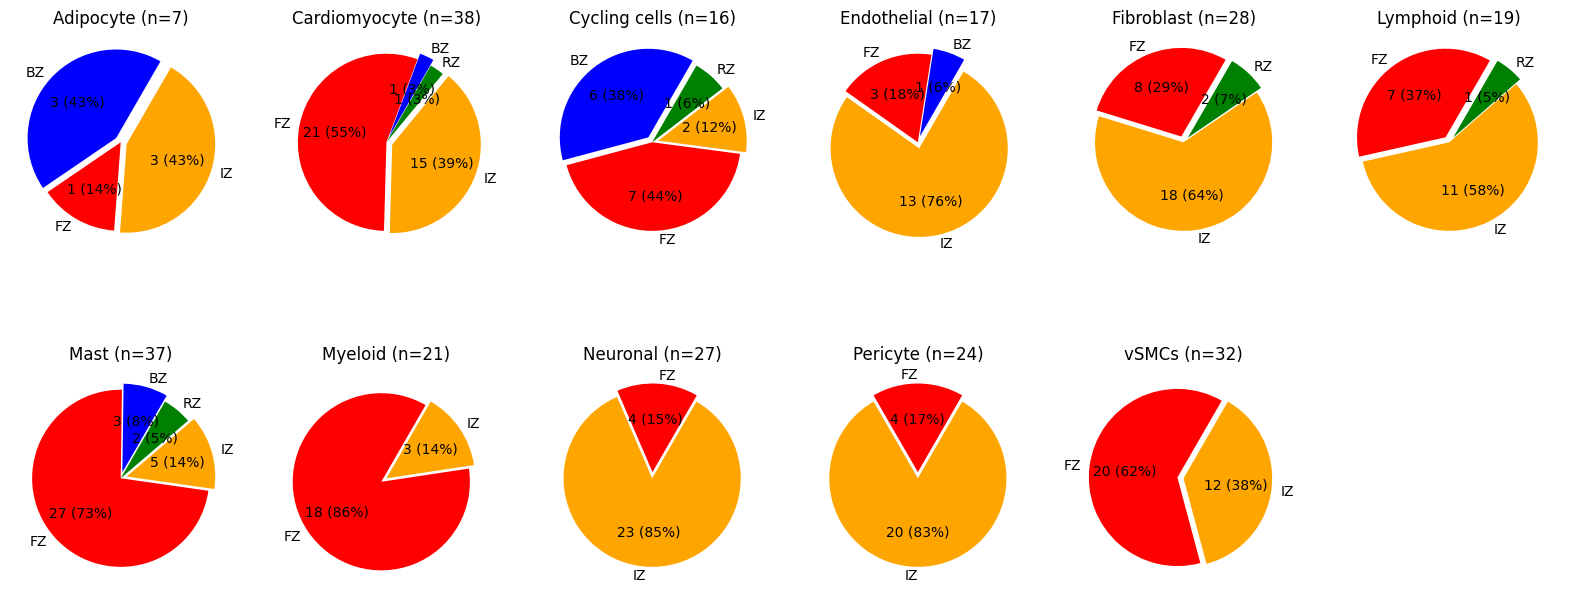

In [152]:
dcolors = {"FZ": "red", "BZ": "blue", "RZ": "green", "IZ": "orange"}

tlda.plot_module_description(nrow=2, figsize=(20,8), dcolors=dcolors)

In [176]:
aid = AIDescriptor()

Fibroblast_FZ_mod_47
Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: The following genes are dysregulated in fibroblasts of human heart: AOX1, MCCC1, ABAT, ACOX1, MDH1, ADH1B, INMT, HIBADH, ALDH3A2, MOCOS, SCP2, ACSF3, ACOX3, TECR, ALDH6A1, MLYCD, DBT, CD38, ZNF236, AASS, GCDH, CAT, PC, RDH11, BST1, MAOA, PCCB, MOCS1, RDH5, ACSS2, DHRS4, NNMT, PHYKPL, ECHDC1, CROT, ACSS1, PCCA, CPT1C, ECH1, SIRT7, CPT1A, ACAT1, PDXK, CPT1B, DHRS3, HNMT, SIRT5, ASL, ACACB, ADH5, DHTKD1, AKAP12, MAOB, EHHADH, ME2, MAP4K5, SUCLG1, PDE7A, ALDH2, ALDH1A1, BTD, ACADS, ALDH7A1, DLST, SIRT3, AGMO, ACSS3, MOCS2, HACL1, HLCS. How are these genes connected and which molecular functions are altered?

Do not repeat functions of single genes.

Only return the helpful answer. Answer must be concise, detailed and well explained.
Helpful answer:
        


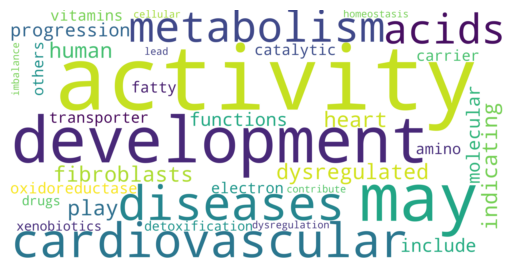

These genes are dysregulated in fibroblasts of human heart, indicating that they may play a role in the development or progression of cardiovascular diseases. The molecular functions of these genes include oxidoreductase activity, catalytic activity, electron carrier activity, and transporter activity. Some of these genes are involved in the metabolism of fatty acids, amino acids, and vitamins, while others are involved in the detoxification of drugs and xenobiotics. The dysregulation of these genes may lead to an imbalance in cellular metabolism and homeostasis, which can contribute to the development of cardiovascular diseases.

Fibroblast_FZ_mod_48
Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: The following genes are dysregulated in fibroblasts of human heart: SOAT1, IL13RA1, IL12RB2, CSF3R, USP18, IL27RA, EPOR, SNX8, LIFR, SOCS2, IL6ST, IL11RA, ELP2, PRLR,

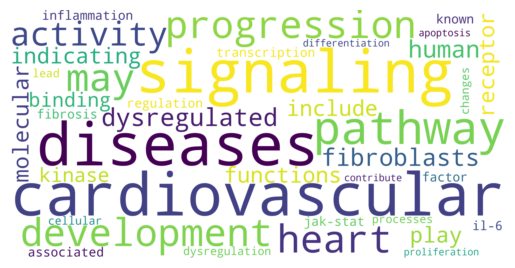

These genes are dysregulated in fibroblasts of human heart, indicating that they may play a role in the development or progression of cardiovascular diseases. The molecular functions of these genes include receptor binding, protein kinase activity, transcription factor activity, and signaling pathway regulation. Some of these genes are involved in the IL-6 signaling pathway, which is known to be associated with inflammation and fibrosis in the heart. Other genes are involved in the JAK-STAT signaling pathway, which is also important for cardiovascular diseases. The dysregulation of these genes may lead to changes in cellular processes such as proliferation, differentiation, and apoptosis, which can contribute to the development or progression of cardiovascular diseases.

Fibroblast_IZ_mod_217
Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: The following genes ar

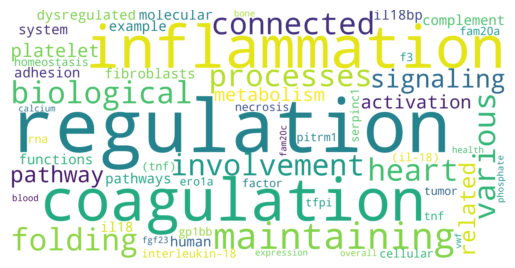

The dysregulated genes in fibroblasts of human heart are involved in various biological processes such as inflammation, coagulation, complement system, cell adhesion, and protein folding. These genes are connected through their involvement in the same pathways or molecular functions. For example, IL18 and IL18BP are both involved in the regulation of interleukin-18 (IL-18) signaling pathway, which is important for inflammation. TNF and TFPI are both involved in the regulation of tumor necrosis factor (TNF) signaling pathway, which is also related to inflammation. GP1BB and F3 are both involved in the regulation of platelet activation, which is important for coagulation. ERO1A and SERPINC1 are both involved in protein folding, which is important for maintaining cellular homeostasis. PITRM1 and FAM20A are both involved in the regulation of RNA metabolism, which is important for gene expression. FGF23 and FAM20C are both involved in the regulation of phosphate and calcium metabolism, whic

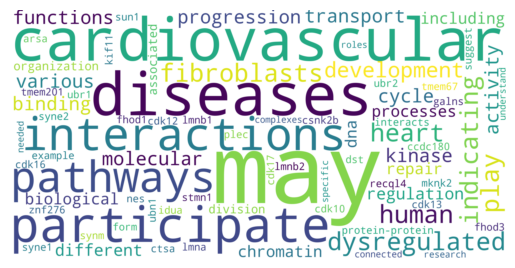

These genes are dysregulated in fibroblasts of human heart, indicating that they may play a role in the development or progression of cardiovascular diseases. The genes are involved in various molecular functions such as protein binding, protein kinase activity, protein transport, and cell cycle regulation. They also participate in different biological processes including DNA repair, chromatin organization, and cell division. Some of these genes are associated with each other through protein-protein interactions or pathways. For example, SUN1 interacts with NES, CDK17, UBR1, CTSA, CSNK2B, MKNK2, IDUA, CDK12, RECQL4, TMEM67, LMNA, FHOD3, SYNE2, KIF11, UBR2, CDK10, CCDC180, ZNF276, SYNE1, ARSA, UBN1, FHOD1, DST, SYNM, CDK13, CDK16, LMNB2, STMN1, PLEC, LMNB1, GALNS, and TMEM201. These interactions suggest that they may form complexes or participate in the same pathways. However, further research is needed to understand how these genes are connected and their specific roles in cardiovascul

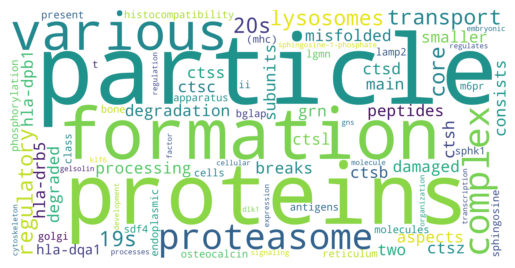

These genes are all involved in various aspects of protein processing and degradation. The proteasome is a complex that breaks down damaged or misfolded proteins into smaller peptides, which can then be further degraded by lysosomes. The proteasome consists of two main subunits: the 20S core particle and the 19S regulatory particle. CTSS, CTSH, CTSL, CTSC, CTSD, CTSB, and CTSZ are all involved in the formation and function of the 20S core particle. GRN is involved in the formation of the 19S regulatory particle. HLA-DPB1, HLA-DRB5, and HLA-DQA1 are major histocompatibility complex (MHC) class II molecules that present antigens to T cells. SDF4, LGMN, and LAMP2 are involved in the transport of proteins into lysosomes. BGLAP encodes osteocalcin, a protein that is important for bone formation. M6PR is involved in the transport of proteins from the endoplasmic reticulum to the Golgi apparatus. SPHK1 is involved in the phosphorylation of sphingosine to sphingosine-1-phosphate, which is a si

In [177]:
context = "fibroblasts of human heart"
for fibmod in fibModules.name:
    print(fibmod)
    
    res=aid.query_genelist(tlda.communities[fibmod], context, verbose=True, word_cloud=True)
    plt.show()
    plt.close()
    
    print(res)
    print()

In [46]:
[x for x in tlda.cellgroupdata]

['Adipocyte',
 'Cardiomyocyte',
 'Cycling cells',
 'Endothelial',
 'Fibroblast',
 'Lymphoid',
 'Mast',
 'Myeloid',
 'Neuronal',
 'Pericyte',
 'vSMCs',
 'Fibroblasts']

In [47]:
subgroup_scores = dict()
for sg in tlda.cellgroupdata["Fibroblast"]["kg"]:
    subgroup_scores[sg] = tlda.cellgroupdata["Fibroblast"]["kg"][sg].get_edge_scores(score_accessor=lambda x: x.get("fc_score", 0))

df = pd.DataFrame.from_dict(subgroup_scores)


In [58]:
small_subgroup_scores = {x: random.sample(subgroup_scores[x], 100000) for x in subgroup_scores}
dfs = pd.DataFrame.from_dict(small_subgroup_scores)

<Axes: >

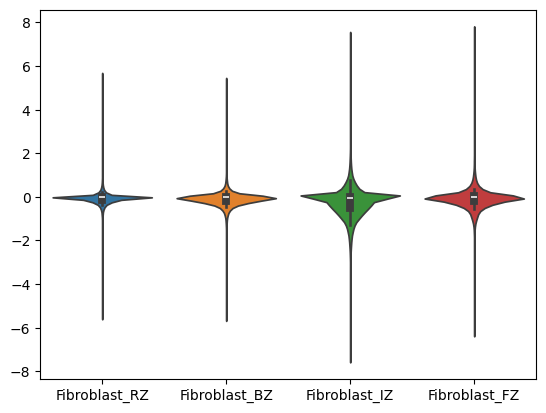

In [48]:
sns.violinplot(data=df)

In [49]:
df.head()

Fibroblast_RZ  Fibroblast_BZ  Fibroblast_IZ  Fibroblast_FZ
0      -0.259545      -0.202832      -0.947941      -0.427959
1      -0.007344       0.033568      -0.064005      -0.034950
2      -0.319475      -0.210355      -0.728131      -0.417255
3      -0.152492      -0.126864      -0.367229      -0.260261
4      -0.215309      -0.297717      -1.242256      -0.519471

In [68]:
dfl = df.melt()
dfl.head()

variable     value
0  Fibroblast_RZ -0.259545
1  Fibroblast_RZ -0.007344
2  Fibroblast_RZ -0.319475
3  Fibroblast_RZ -0.152492
4  Fibroblast_RZ -0.215309

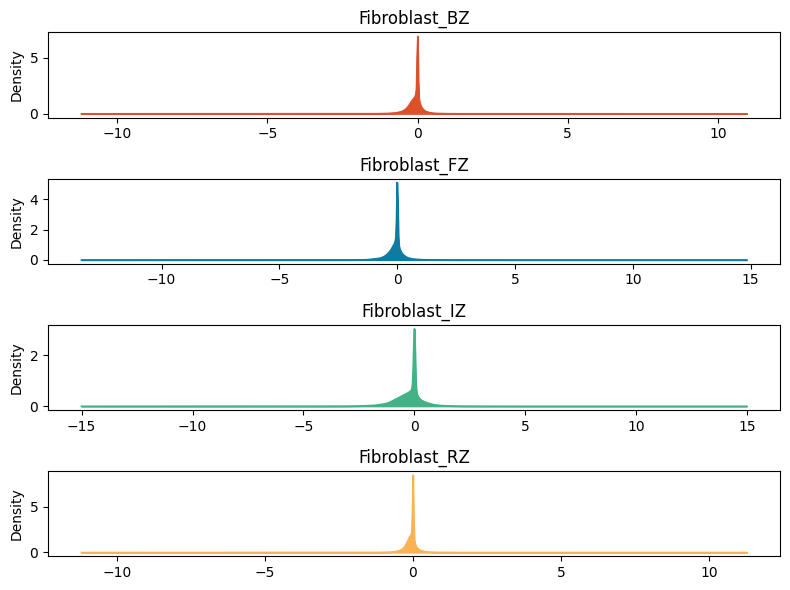

In [69]:
varnames = sorted(dfl.variable.unique())
gs = (matplotlib.gridspec.GridSpec(len(varnames),1))
colors=["#DD5129FF", "#0F7BA2FF", "#43B284FF", "#FAB255FF"]

fig = plt.figure(figsize=(8,6))

i = 0

#creating empty list
ax_objs = []

for var in varnames:
    # creating new axes object and appending to ax_objs
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    # plotting the distribution
    plot = (dfl[dfl.variable == var]
            .value.plot.kde(ax=ax_objs[-1],color=colors[i], lw=1)
           )

    # grabbing x and y data from the kde plot
    x = plot.get_children()[0]._x
    y = plot.get_children()[0]._y

    # filling the space beneath the distribution
    ax_objs[-1].fill_between(x,y,color=colors[i])

    # setting uniform x and y lims
    #ax_objs[-1].set_xlim(0, 1)
    #ax_objs[-1].set_ylim(0,2.2)
    ax_objs[-1].set_title(var)

    i += 1

plt.tight_layout()
plt.show()

In [21]:
objkg = tlda.cellgroupdata["Fibroblast"]["communities_enhanced"]["Fibroblast_IZ_mod_127"]
for gene in objkg.kg.nodes:
    
    hasEdge = (gene, "NTN1") in objkg.kg.edges or ("NTN1", gene) in objkg.kg.edges
    print(gene, hasEd)

SUN1
NES
CDK17
UBR1
CTSA
MKNK2
CSNK2B
IDUA
CDK12
RECQL4
TMEM67
LMNA
GO:0021817
FHOD3
Orphanet:98853
SYNE2
KIF11
UBR2
CDK10
CCDC180
ZNF276
SYNE1
ARSA
UBN1
FHOD1
DST
SYNM
CDK13
CDK16
LMNB2
STMN1
PLEC
LMNB1
GALNS
TMEM201
CHEMBL2105661


In [29]:
allSigKG = dict(tlda.cellgroupdata["Myeloid"]["communities_enhanced"], **tlda.cellgroupdata["Cardiomyocyte"]["communities_enhanced"], **tlda.cellgroupdata["vSMCs"]["communities_enhanced"], **tlda.cellgroupdata["Fibroblast"]["communities_enhanced"])

In [30]:
mc = ModuleCompare()

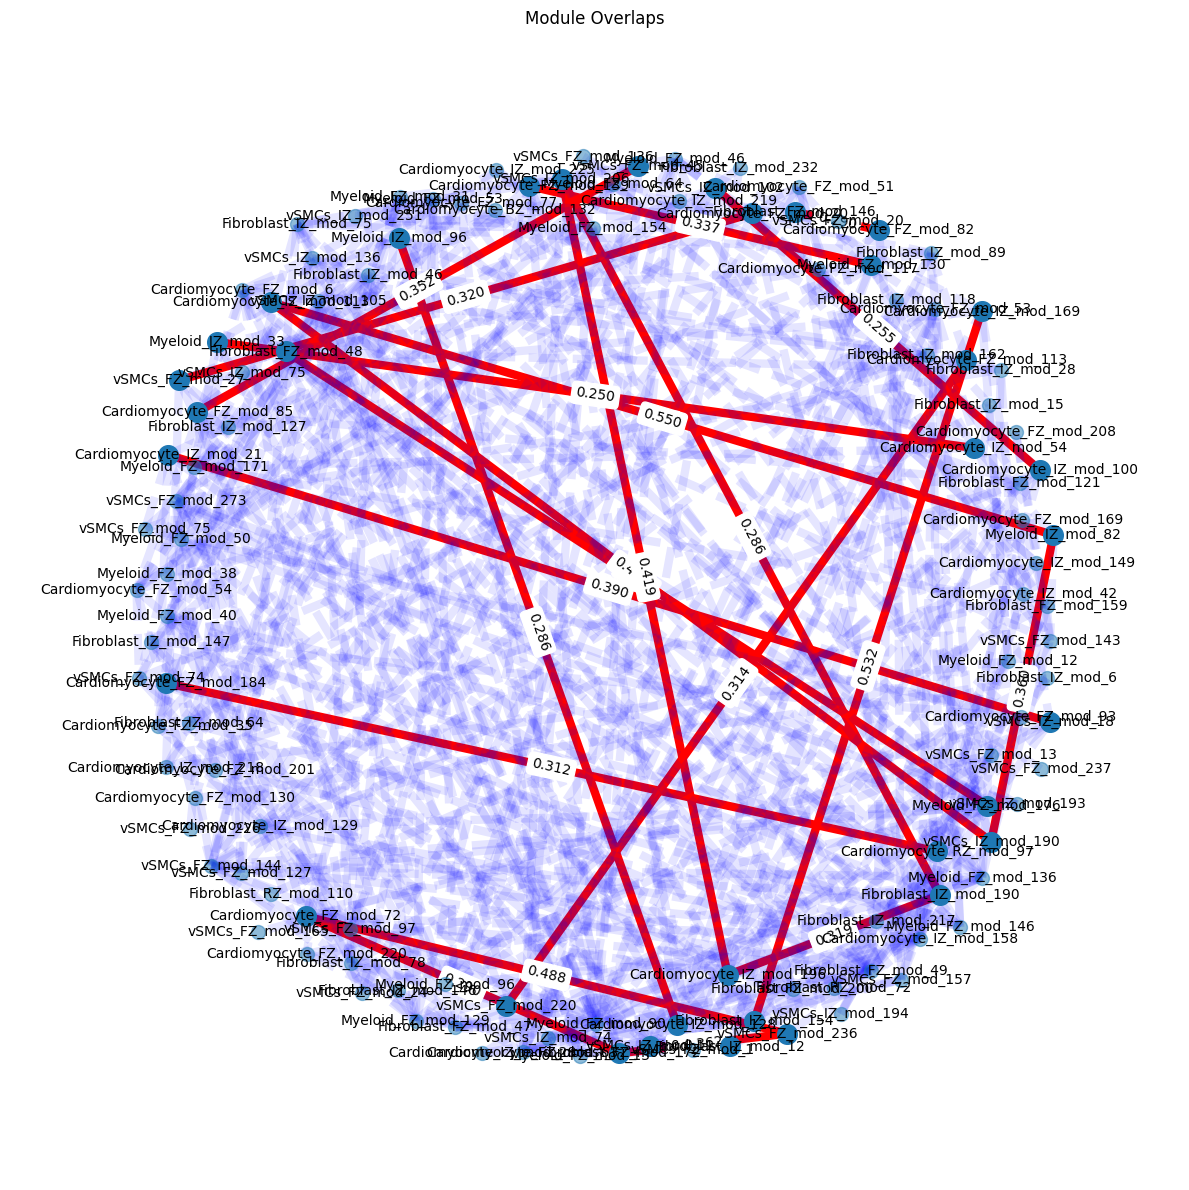

In [31]:
jaccardSims = mc.network_compare_modules(allSigKG, measure="jaccard", borderWeightQuantile=0.95)

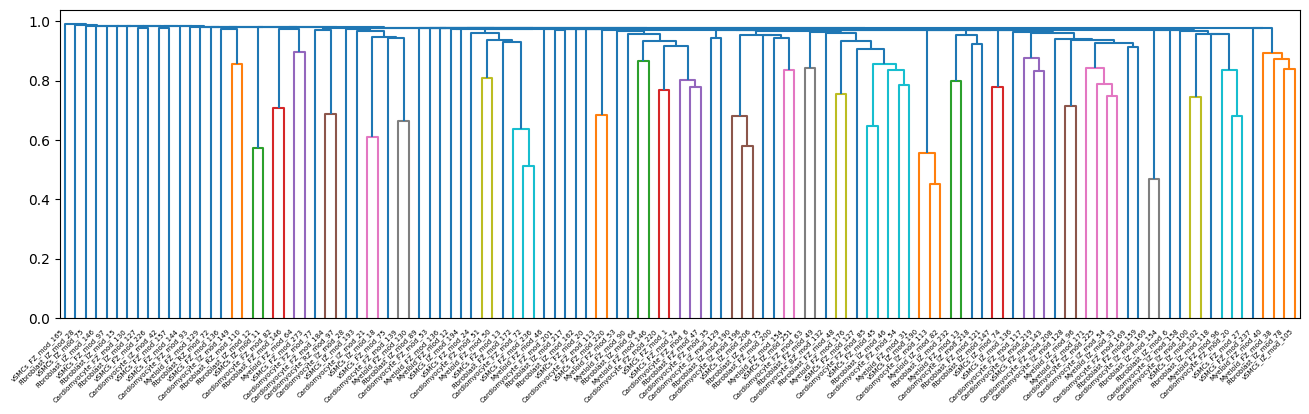

In [32]:
mc.plot_dendrogram(jaccardSims, figsize=(16, 4), color_threshold=0.9)

In [33]:
jdf = mc.module_similarities_to_df(jaccardSims)
jdf

Module1                   Module2  Similarity
256          Myeloid_IZ_mod_82  Cardiomyocyte_IZ_mod_113    0.550000
3436  Cardiomyocyte_IZ_mod_169     Fibroblast_IZ_mod_154    0.532258
3893   Cardiomyocyte_FZ_mod_72          vSMCs_FZ_mod_236    0.488372
2599  Cardiomyocyte_IZ_mod_113          vSMCs_IZ_mod_190    0.444444
5291           vSMCs_IZ_mod_11      Fibroblast_IZ_mod_12    0.428571
...                        ...                       ...         ...
2428  Cardiomyocyte_BZ_mod_132          vSMCs_FZ_mod_157    0.000000
2427  Cardiomyocyte_BZ_mod_132           vSMCs_FZ_mod_24    0.000000
2426  Cardiomyocyte_BZ_mod_132          vSMCs_FZ_mod_144    0.000000
2425  Cardiomyocyte_BZ_mod_132           vSMCs_FZ_mod_45    0.000000
2438  Cardiomyocyte_BZ_mod_132      Fibroblast_IZ_mod_64    0.000000

[7021 rows x 3 columns]

/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/mnt/extproj/projekte/bartelt/software/miniconda3/envs/regnetworks/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


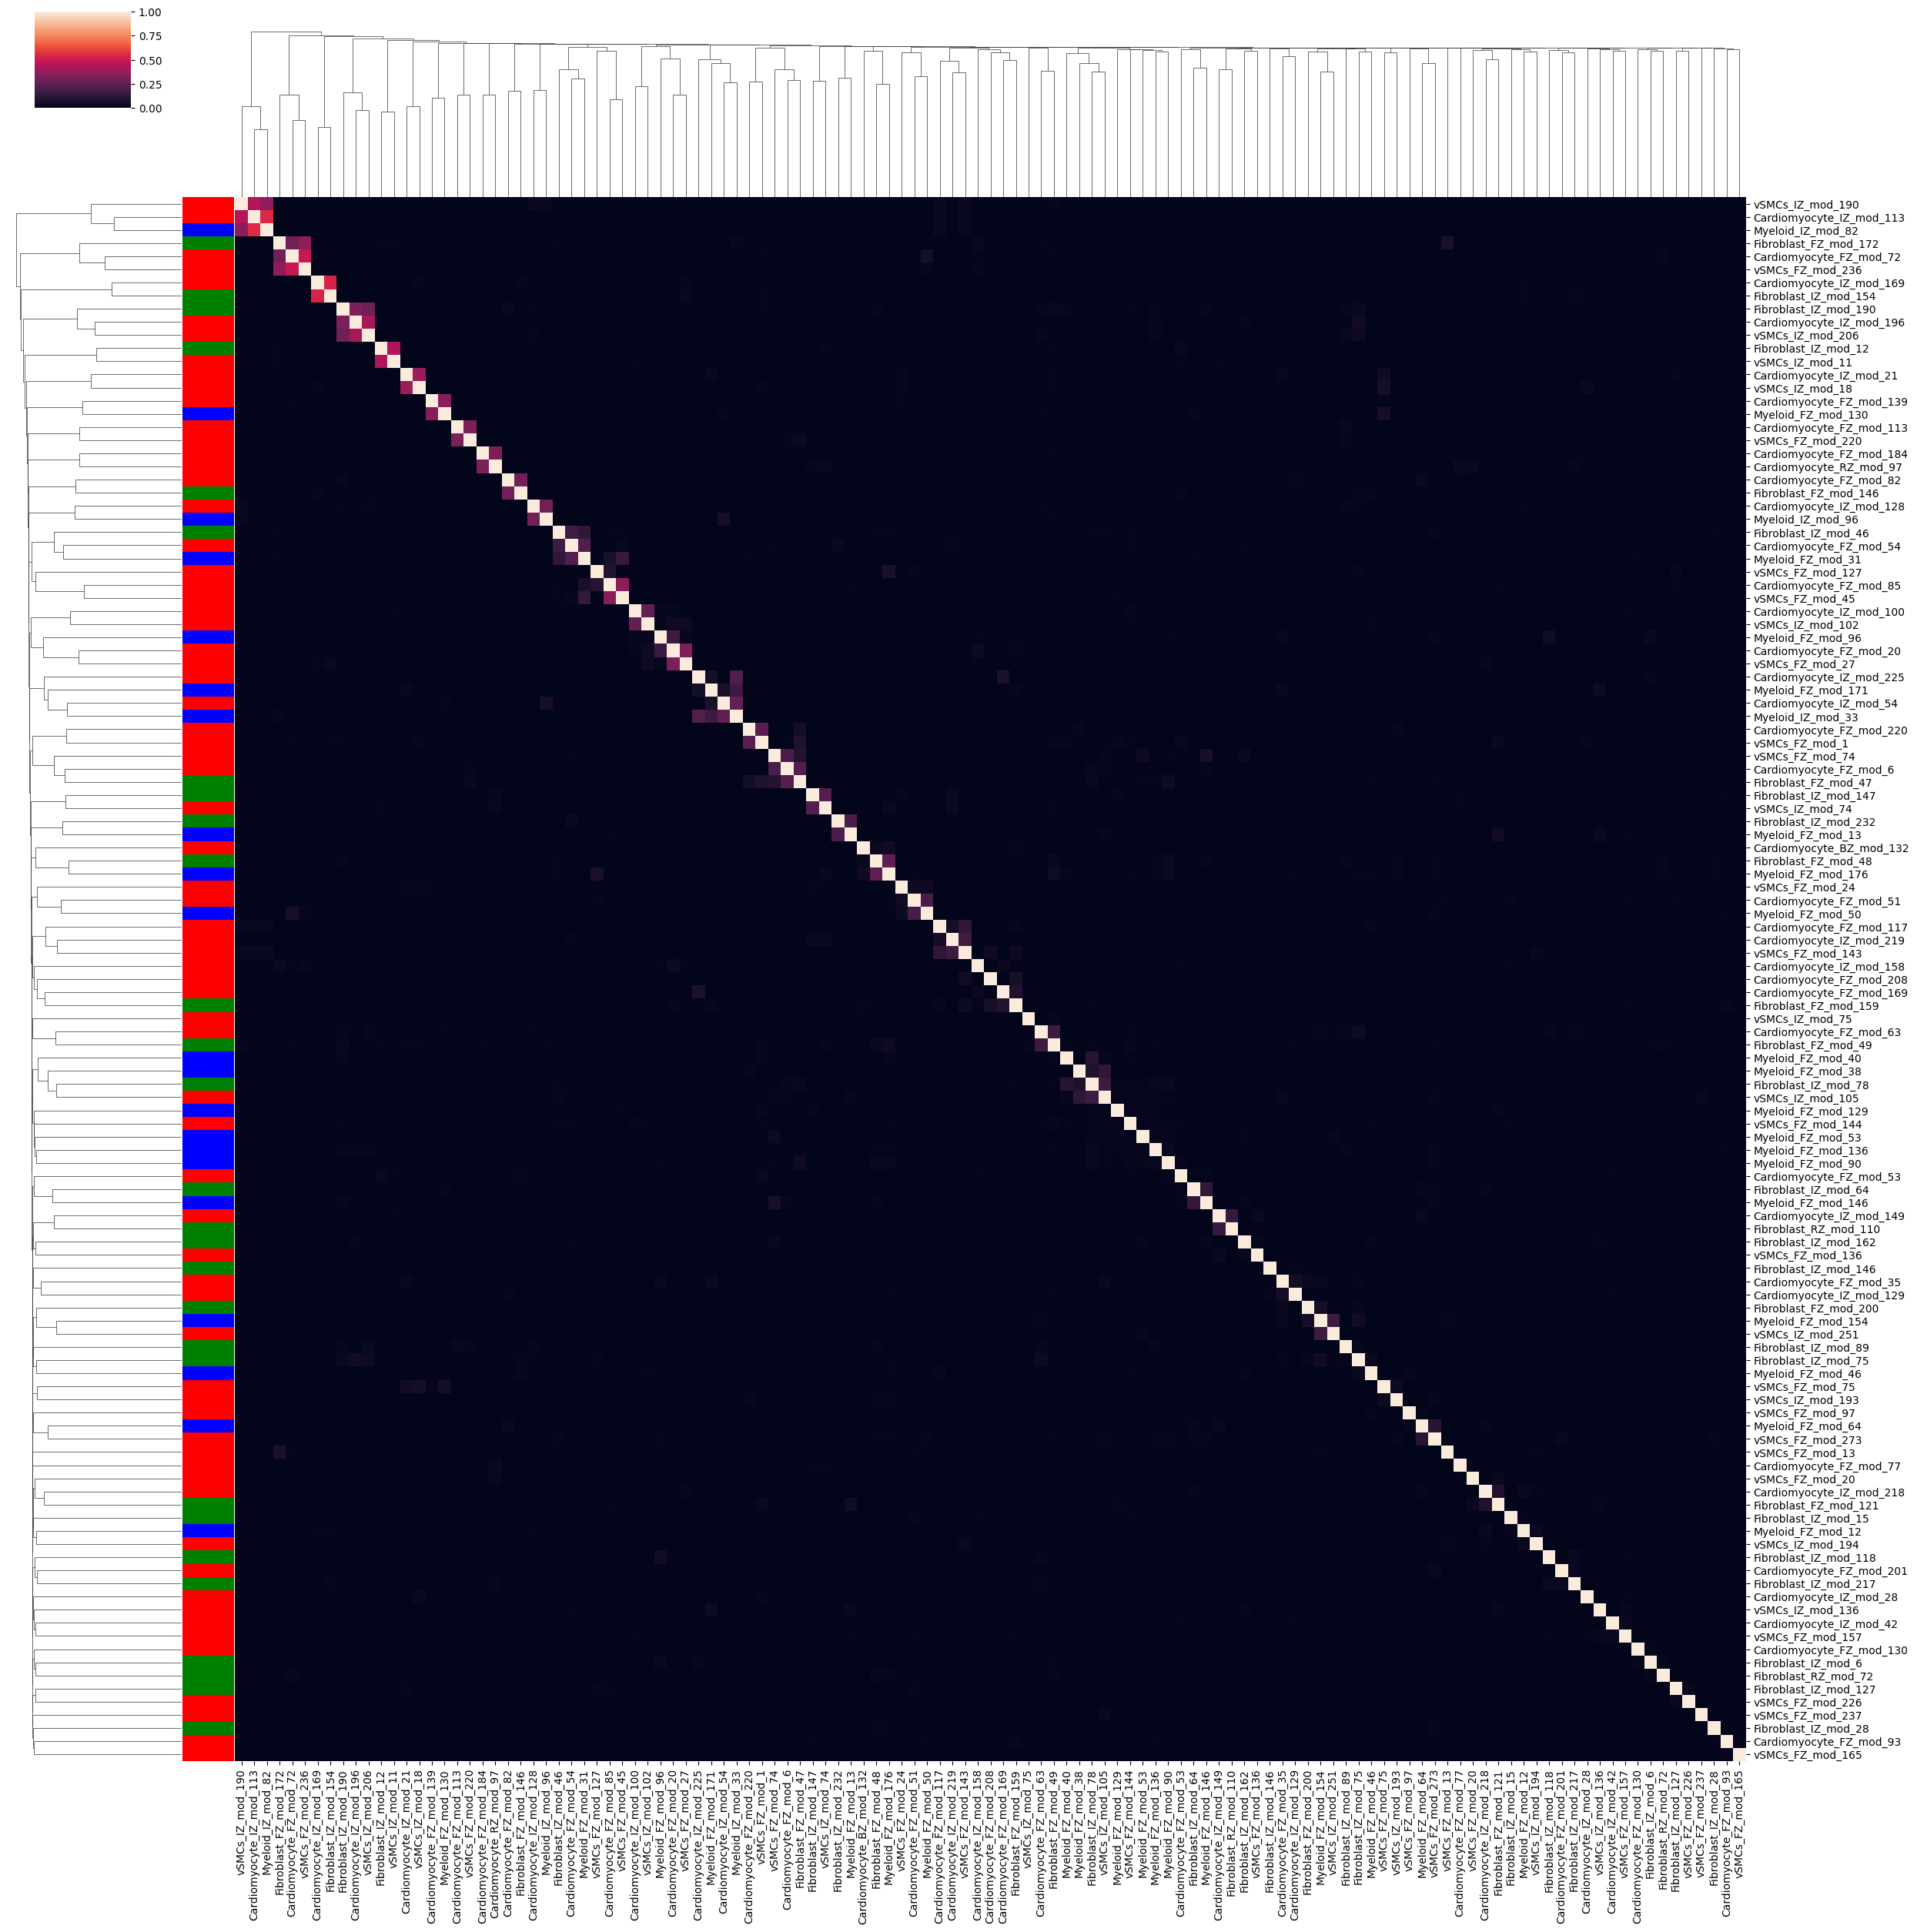

In [34]:
mods = sorted(set(list(jdf.Module1) + list(jdf.Module2)))
pjdf = pd.DataFrame( np.diag( [1.0]*(len(mods)) ), index=mods, columns=mods)

for ri, row in jdf.iterrows():
    pjdf.loc[row["Module1"], row["Module2"] ] = row["Similarity"]
    pjdf.loc[row["Module2"], row["Module1"] ] = row["Similarity"]

colors = [x.split("_")[0] for x in pjdf.index]

lut = dict(zip(set(colors), "rbgr"))
row_colors = pd.Series(colors).map(lut)
row_colors.columns = "Tissue"
sns.clustermap(pjdf, row_colors=row_colors.values, figsize=(25,25), dendrogram_ratio=0.1, colors_ratio=0.03, cbar_pos=(0.02, 0.95, 0.05, 0.05), xticklabels=True, yticklabels=True)

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


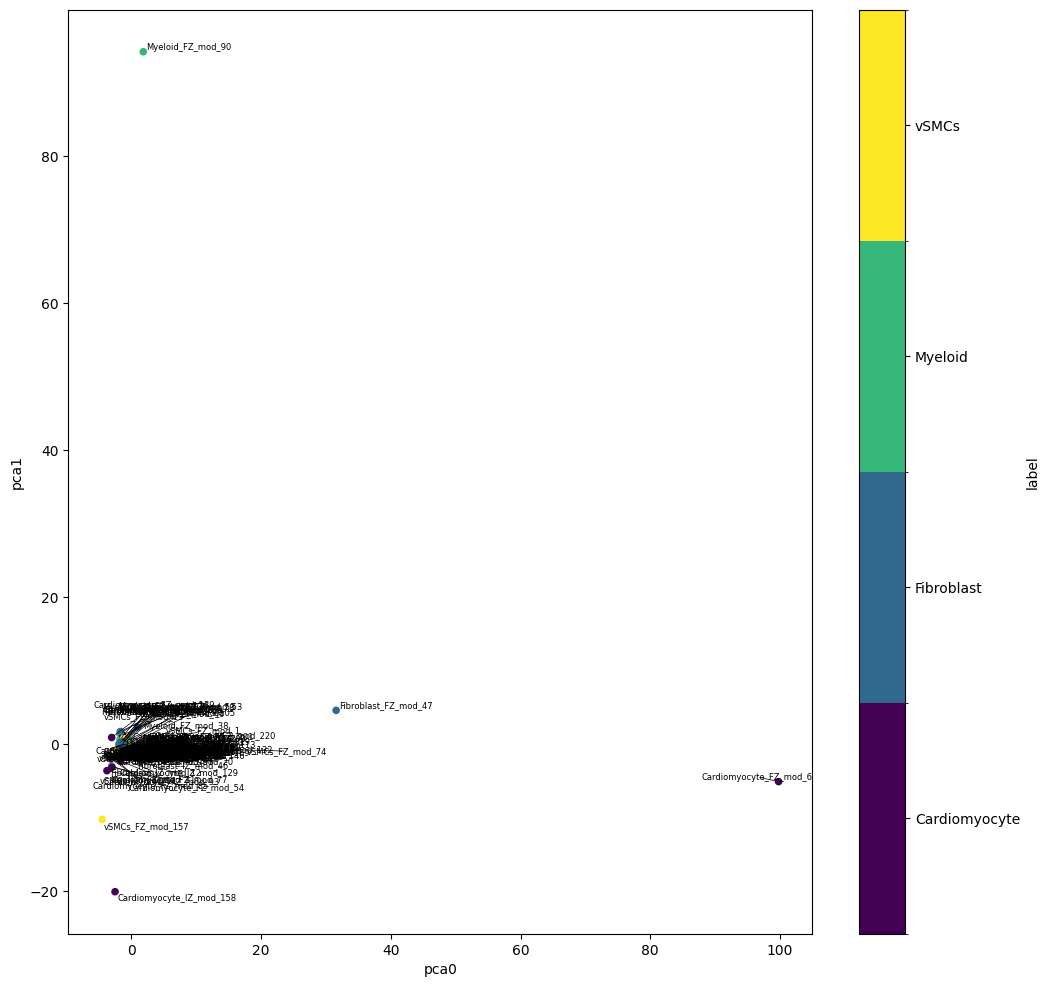

In [35]:
emb = mc.module_pca(allSigKG, kg)

In [36]:
ns = NETSIM(kg)

|#########################################################| 100% Time:  1:10:5756


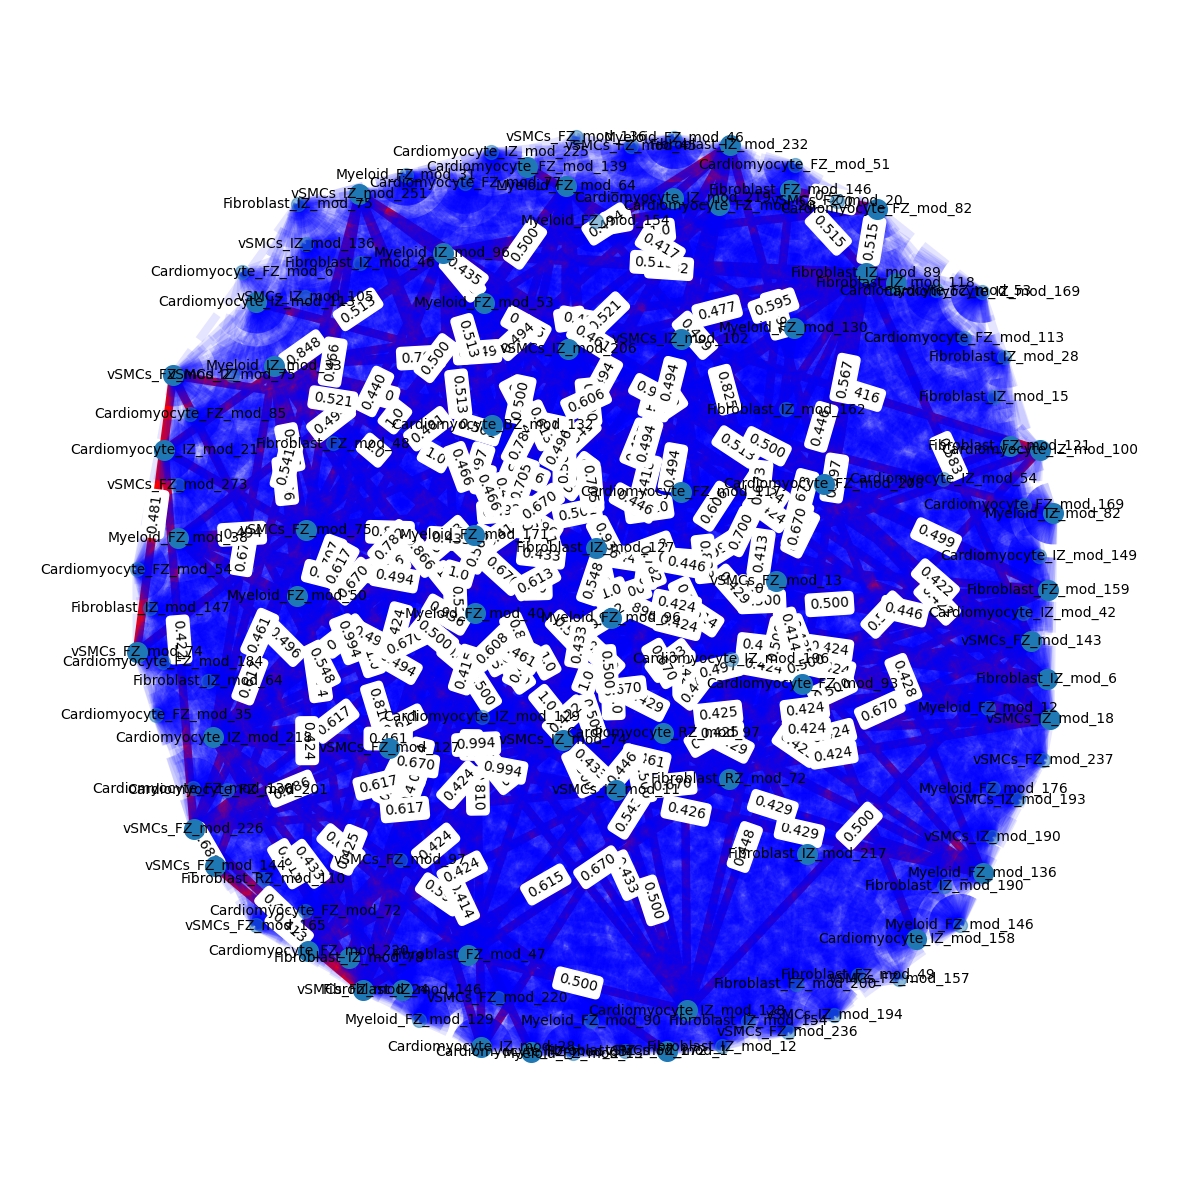

In [37]:
modNetSims = mc.network_compare_netsim(allSigKG, ns=ns, max_terms=2, borderWeightQuantile=0.95)

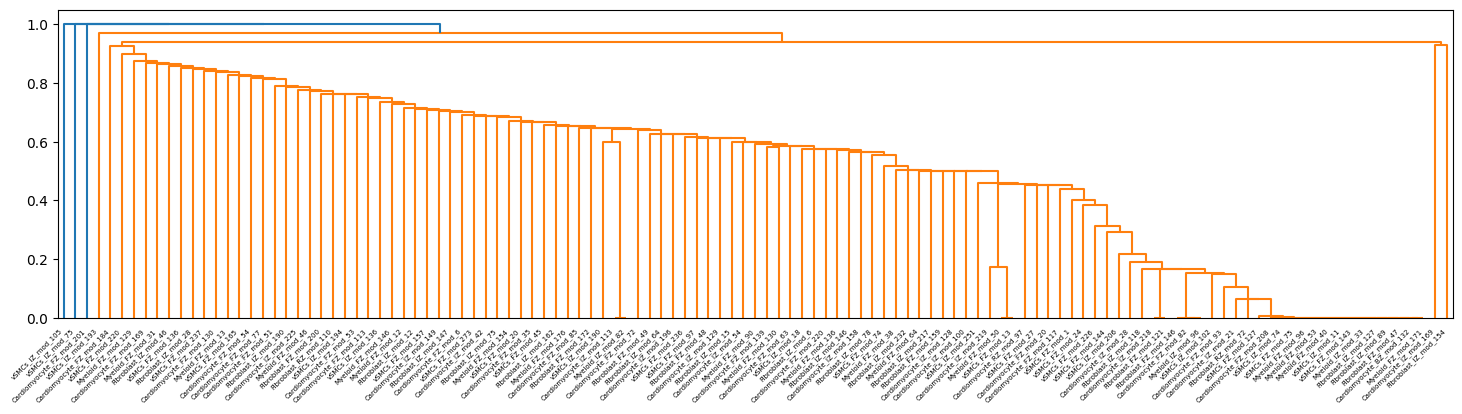

In [38]:
mc.plot_dendrogram(modNetSims, figsize=(18,4))

In [72]:
singlecatKGs = dict(tlda.cellgroupdata["Fibroblast"]["communities_enhanced"])

|#########################################################| 100% Time:  0:05:3047


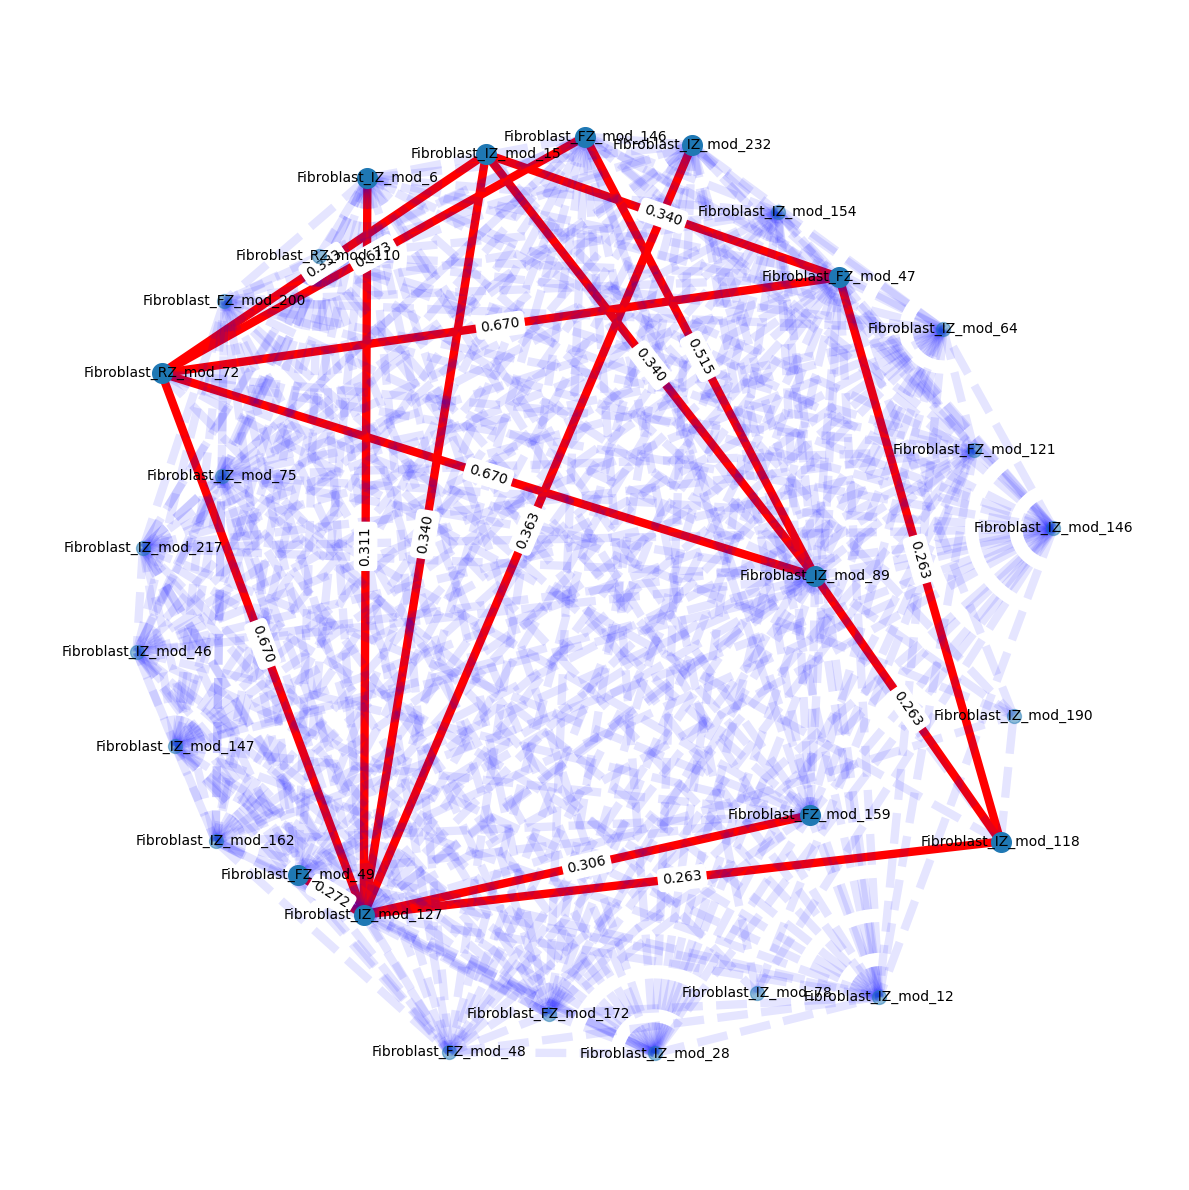

In [73]:
modNetSims_single = mc.network_compare_netsim(singlecatKGs, ns=ns, max_terms=2, borderWeightQuantile=0.95)

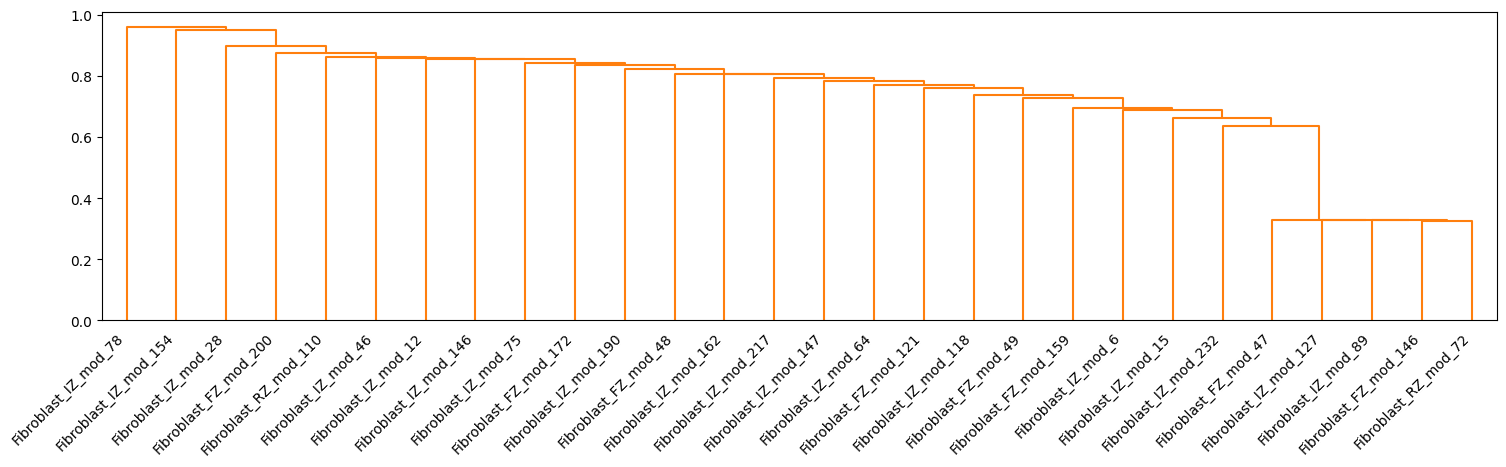

In [74]:
mc.plot_dendrogram(modNetSims_single, figsize=(18,4))

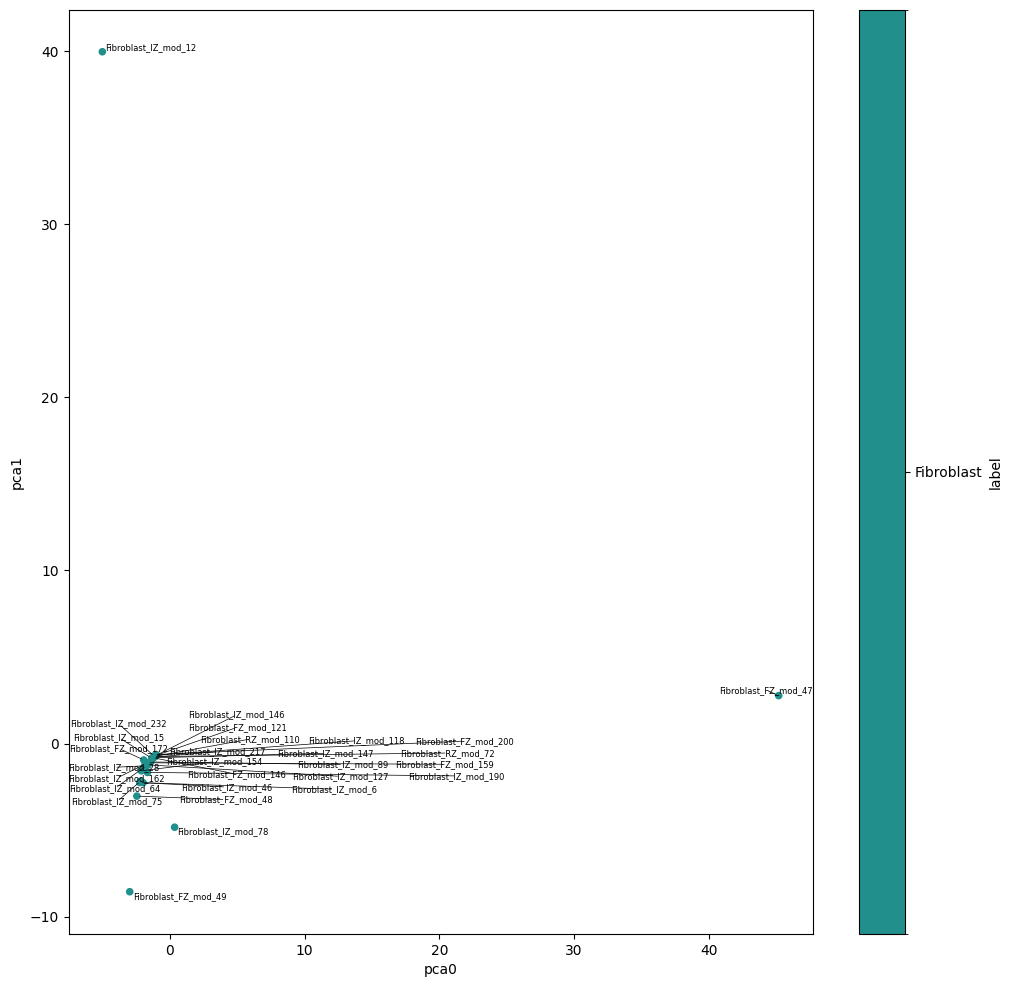

In [75]:
emb = mc.module_pca(singlecatKGs, kg)